# <center>MartinByrne_DVisHDip_CA1 </center> 

### Installations -
There are some libraries that may need to be installed, they are listed in the cell below and can be commented and uncommented as needed.

In [ ]:
# https://pypi.org/project/missingno/
# ! pip install missingno

# ! pip install plotly-express

# https://plotly.com/python/static-image-export/
# ! pip install -U kaleido

# https://github.com/laserson/squarify
# ! pip install squarify

# ! pip install matplotlib --force-reinstall --user

### Imports
Libraries that contain needed functionality to be able to perform operations on the dataset are imported as well as supressing version warnings that may occur when a cell is run.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import squarify

# Suppress some library warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <center>EDA</center> 
Exploratory Data Analysis allows us to bring in a dataset and examine it for useful information. This will include type(s) of data present, the dimensionality of the dataset, whether there is any information missing or null values present. Any analysis will be conducted on a copy of the dataset to avoid any unintended errors.

#### Import Dataset

In [2]:
data = pd.read_csv('board_games.csv')

#### Create copy of dataset to explore

In [3]:
data_eda = data.copy()

#### Check dataset dimensions (rows and columns)

In [4]:
data_eda.shape

(10532, 22)

#### Check the dataset type

In [5]:
type(data_eda)

pandas.core.frame.DataFrame

#### Check basic dataset statistics (Only for numeric type columns, to see categorical variables use the include=object parameter)

In [6]:
data_eda.describe()

game_id   max_players  max_playtime       min_age   min_players  \
count   10532.000000  10532.000000  10532.000000  10532.000000  10532.000000   
mean    62059.203095      5.657330     91.341436      9.714964      2.070547   
std     66223.716828     18.884403    659.754400      3.451226      0.664394   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      5444.500000      4.000000     30.000000      8.000000      2.000000   
50%     28822.500000      4.000000     45.000000     10.000000      2.000000   
75%    126409.500000      6.000000     90.000000     12.000000      2.000000   
max    216725.000000    999.000000  60000.000000     42.000000      9.000000   

       min_playtime  playing_time  year_published  average_rating  \
count  10532.000000  10532.000000    10532.000000    10532.000000   
mean      80.882738     91.341436     2003.070832        6.370856   
std      637.873893    659.754400       12.278296        0.850364   
min        0.000000      0.000000     1950.000000        1.384210   
25%       25.000000     30.000000     1998.000000        5.829585   
50%       45.000000     45.000000     2007.000000        6.392965   
75%       90.000000     90.000000     2012.000000        6.942675   
max    60000.000000  60000.000000     2016.000000        9.003920   

        users_rated  
count  10532.000000  
mean     870.081466  
std     2880.214998  
min       50.000000  
25%       85.000000  
50%      176.000000  
75%      518.000000  
max    67655.000000

In [7]:
data_eda.describe(include=object)

description  \
count                                               10532   
unique                                              10528   
top     How could that have happened? Black Stories ar...   
freq                                                    3   

                                               image        name  \
count                                          10531       10532   
unique                                         10527       10357   
top     //cf.geekdo-images.com/images/pic2262580.png  Robin Hood   
freq                                               2           5   

                                             thumbnail           artist  \
count                                            10531             7759   
unique                                           10527             4641   
top     //cf.geekdo-images.com/images/pic2410035_t.png  Franz Vohwinkel   
freq                                                 2              166   

                    category                               compilation  \
count                  10438                                       410   
unique                  3860                                       336   
top     Wargame,World War II  Traveller: The Classic Games, Games 1-6+   
freq                     449                                         8   

            designer                 expansion                     family  \
count          10406                      2752                       7724   
unique          4678                      2634                       3918   
top     (Uncredited)  Last Battles of Napoleon  Crowdfunding: Kickstarter   
freq             558                         7                        391   

               mechanic  publisher  
count              9582      10529  
unique             3209       5512  
top     Hex-and-Counter  GMT Games  
freq                523        180

#### Check the data types that are contained in the dataset

In [8]:
data_eda.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

#### The head() method checks the first number of rows in a dataset, by default this is 5 but by adding a parameter eg 10 we can see more rows

In [9]:
data_eda.head(10)

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   
5        6  In the ancient lands along the Mediterranean, ...   
6        7  In Cathedral, each player has a set of pieces ...   
7        8  In this interesting offering from Warfrog, pla...   
8        9  Although referred to as a sequel to El Grande,...   
9       10  Elfenland is a redesign of the original White ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   
5    //cf.geekdo-images.com/images/pic28424.jpg            6           240   
6   //cf.geekdo-images.com/images/pic181642.jpg            2            20   
7   //cf.geekdo-images.com/images/pic374320.jpg            5           120   
8  //cf.geekdo-images.com/images/pic1731731.jpg            4            90   
9  //cf.geekdo-images.com/images/pic1798136.jpg            6            60   

   min_age  min_players  min_playtime                name  playing_time  ...  \
0       14            3           240          Die Macher           240  ...   
1       12            3            30        Dragonmaster            30  ...   
2       10            2            30             Samurai            60  ...   
3       12            2            60      Tal der Könige            60  ...   
4       12            3            90             Acquire            90  ...   
5       12            2           240  Mare Mediterraneum           240  ...   
6        8            2            20           Cathedral            20  ...   
7       12            2           120   Lords of Creation           120  ...   
8       13            2            90        El Caballero            90  ...   
9       10            2            60           Elfenland            60  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   
5                 Jean du Poël           Civilization,Nautical         NaN   
6                  S. Mattusek               Abstract Strategy         NaN   
7                   Bryan King            Civilization,Fantasy         NaN   
8               Doris Matthäus                     Exploration         NaN   
9               Doris Matthäus                  Fantasy,Travel         NaN   

                         designer  \
0              Karl-Heinz Schmiel   
1           G. W. "Jerry" D'Arcey   
2                   Reiner Knizia   
3               Christian Beierer   
4                     Sid Sackson   
5                    Jean du Poël   
6                 Robert P. Moore   
7                  Martin Wallace   
8  Wolfgang Kramer,Richard Ulrich   
9                    Alan R. Moon   

                                           expansion  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   


#### The tail() method shows the last number of rows in a dataset and is the opposite of head(), it has the same functionality

In [10]:
data_eda.tail(10)

game_id                                        description  \
10522   211450  Take That - Who has to swallow the bitter toad...   
10523   212382  In Yangtze, players are distributors on the Ya...   
10524   212445  Description from the publisher:&#10;&#10;Blood...   
10525   212551  Qwixx: Das Duell is a stand alone two player v...   
10526   212956  Description from the publisher:&#10;&#10;Trapp...   
10527   214996  Description from the publisher:&#10;&#10;Silve...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10530   216201  The race is on for the robots of the Robo Rall...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
10522  //cf.geekdo-images.com/images/pic3227467.jpg            4   
10523  //cf.geekdo-images.com/images/pic3239043.jpg            4   
10524  //cf.geekdo-images.com/images/pic3254491.jpg            2   
10525  //cf.geekdo-images.com/images/pic3258506.png            2   
10526  //cf.geekdo-images.com/images/pic3269641.jpg            8   
10527  //cf.geekdo-images.com/images/pic3093082.png            2   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10530  //cf.geekdo-images.com/images/pic3374227.jpg            6   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
10522             0        8            2            20   
10523            60        8            2            60   
10524           120       12            2            45   
10525            15       12            2            15   
10526            60       10            1            30   
10527           480       12            1            30   
10528            45       13            2            45   
10529            20       12            2            20   
10530           120       12            2            20   
10531            60       14            1            30   

                                                    name  playing_time  ...  \
10522                                          Take That             0  ...   
10523                                            Yangtze            60  ...   
10524                          Blood Bowl (2016 edition)           120  ...   
10525                                   Qwixx: Das Duell            15  ...   
10526                                   Room 25 Ultimate            60  ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...           480  ...   
10528               Codex: Card-Time Strategy – Core Set            45  ...   
10529                                     Wind the Film!            20  ...   
10530                                  Robo Rally (2016)           120  ...   
10531    Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

                                                  artist  \
10522                                Oliver Freudenreich   
10523                       Klemens Franz,Andrea Kattnig   
10524  Wayne England,David Gallagher,Pete Knifton,Ric...   
10525                                                NaN   
10526               Daniel Balage,Camille Durand-Kriegel   
10527                                     Charles Kibler   
10528                                                NaN   
10529                             宝井 貴子 (Takako Takarai)   
10530                                                NaN   
10531                               Mihajlo Dimitrievski   

                                                category  \
10522                                          Card Game   
10523                                                NaN   
10524                 Fantasy,Fighting,Miniatures,Sports   
10525                                               Dice   
10526  Bluffing,H

#### Check the dataset for cells that have a NaN  value which stands for not a number or a missing value

This can be done a couple of different ways but by using the dataset as a parameter we get to see if columns contain these values

In [11]:
pd.isnull(data_eda).any()

game_id           False
description       False
image              True
max_players       False
max_playtime      False
min_age           False
min_players       False
min_playtime      False
name              False
playing_time      False
thumbnail          True
year_published    False
artist             True
category           True
compilation        True
designer           True
expansion          True
family             True
mechanic           True
publisher          True
average_rating    False
users_rated       False
dtype: bool

#### See the amount of NaN values, per column using .sum(), then see the total for the dataset by adding a second .sum()

In [12]:
data_eda.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [13]:
data_eda.isnull().sum().sum()

24658

#### A visual representation of columns that have missing data using the Missingno library.

Blue lines are added for each value and white is where the value is missing. The left hand side of the plot shows the highest total number of values that occur in any of the columns and is used to show the scale of the plot.

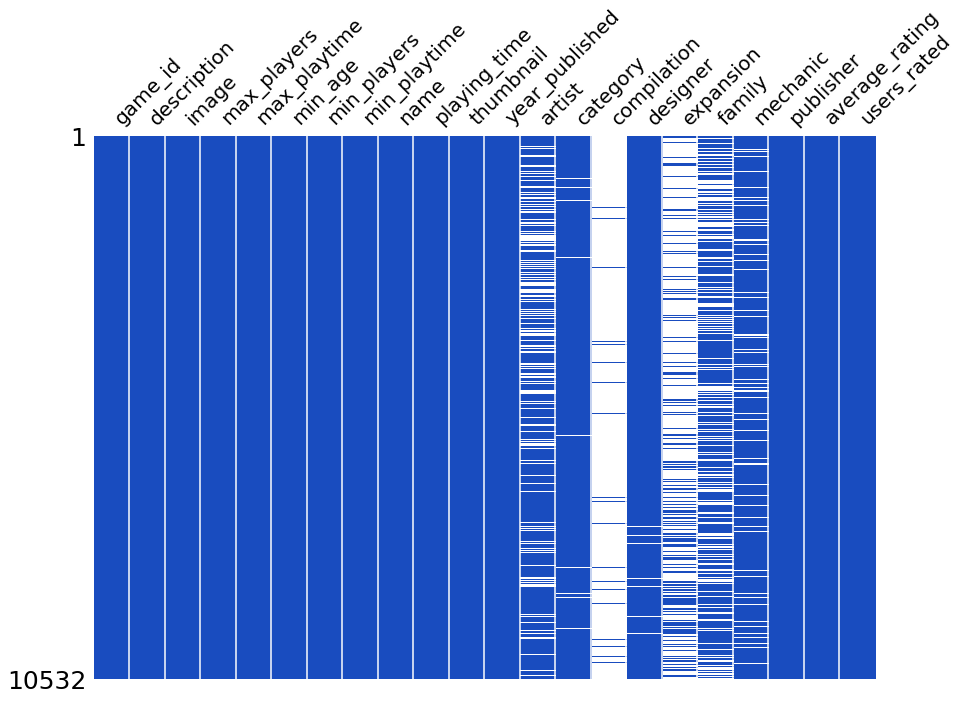

In [14]:
msno.matrix(data_eda, figsize=(14, 10), fontsize=20, sparkline=False, color=(0.1, 0.3, 0.75));

#### Drop the NaN or null values if they are not useful to us (in some cases the amount of NaN values maybe useful)

In [15]:
data_eda.dropna(axis=1, how='all')


game_id                                        description  \
0            1  Die Macher is a game about seven sequential po...   
1            2  Dragonmaster is a trick-taking card game based...   
2            3  Part of the Knizia tile-laying trilogy, Samura...   
3            4  When you see the triangular box and the luxuri...   
4            5  In Acquire, each player strategically invests ...   
...        ...                                                ...   
10527   214996  Description from the publisher:&#10;&#10;Silve...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10530   216201  The race is on for the robots of the Robo Rall...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
1       //cf.geekdo-images.com/images/pic184174.jpg            4   
2      //cf.geekdo-images.com/images/pic3211873.jpg            4   
3       //cf.geekdo-images.com/images/pic285299.jpg            4   
4       //cf.geekdo-images.com/images/pic342163.jpg            6   
...                                             ...          ...   
10527  //cf.geekdo-images.com/images/pic3093082.png            2   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10530  //cf.geekdo-images.com/images/pic3374227.jpg            6   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
0               240       14            3           240   
1                30       12            3            30   
2                60       10            2            30   
3                60       12            2            60   
4                90       12            3            90   
...             ...      ...          ...           ...   
10527           480       12            1            30   
10528            45       13            2            45   
10529            20       12            2            20   
10530           120       12            2            20   
10531            60       14            1            30   

                                                    name  playing_time  ...  \
0                                             Die Macher           240  ...   
1                                           Dragonmaster            30  ...   
2                                                Samurai            60  ...   
3                                         Tal der Könige            60  ...   
4                                                Acquire            90  ...   
...                                                  ...           ...  ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...           480  ...   
10528               Codex: Card-Time Strategy – Core Set            45  ...   
10529                                     Wind the Film!            20  ...   
10530                                  Robo Rally (2016)           120  ...   
10531    Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

                            artist  \
0              Marcus Gschwendtner   
1                       Bob Pepper   
2                  Franz Vohwinkel   
3                              NaN   
4      Scott Okumura,Peter Whitley   
...                            ...   
10527               Charles Kibler   
10528                          NaN   
10529       宝井 貴子 (Takako Takarai)   
10530                          NaN   
10531         Mihajlo Dimitrievski   

                                          category  \
0                   Economic,Negotiation,Political   
1                                Card Game,Fantasy   
2                       Abstract Strategy,Medieval   
3                             

In [16]:
pd.isnull(data_eda).any()

game_id           False
description       False
image              True
max_players       False
max_playtime      False
min_age           False
min_players       False
min_playtime      False
name              False
playing_time      False
thumbnail          True
year_published    False
artist             True
category           True
compilation        True
designer           True
expansion          True
family             True
mechanic           True
publisher          True
average_rating    False
users_rated       False
dtype: bool

In [17]:
data.shape

(10532, 22)

## <center>Part 1</center> 

####  Top 5 average rated games

In order to check to the top 5 average rated games, look at the 'average_rating' column which will show a list of the average ratings of games and the names column is added to match the average rating to the game name.

In [18]:
# Create a copy of the dataset to work on
top_games_data = data.copy()

In [19]:
game_rating = top_games_data[['name','average_rating']]
sorted_game_ratings = game_rating.sort_values('average_rating', ascending=False).head()
sorted_game_ratings

name  average_rating
8348                     Small World Designer Edition         9.00392
6392                           Kingdom Death: Monster         8.93184
9964                           Terra Mystica: Big Box         8.84862
8526                          Last Chance for Victory         8.84603
9675  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081

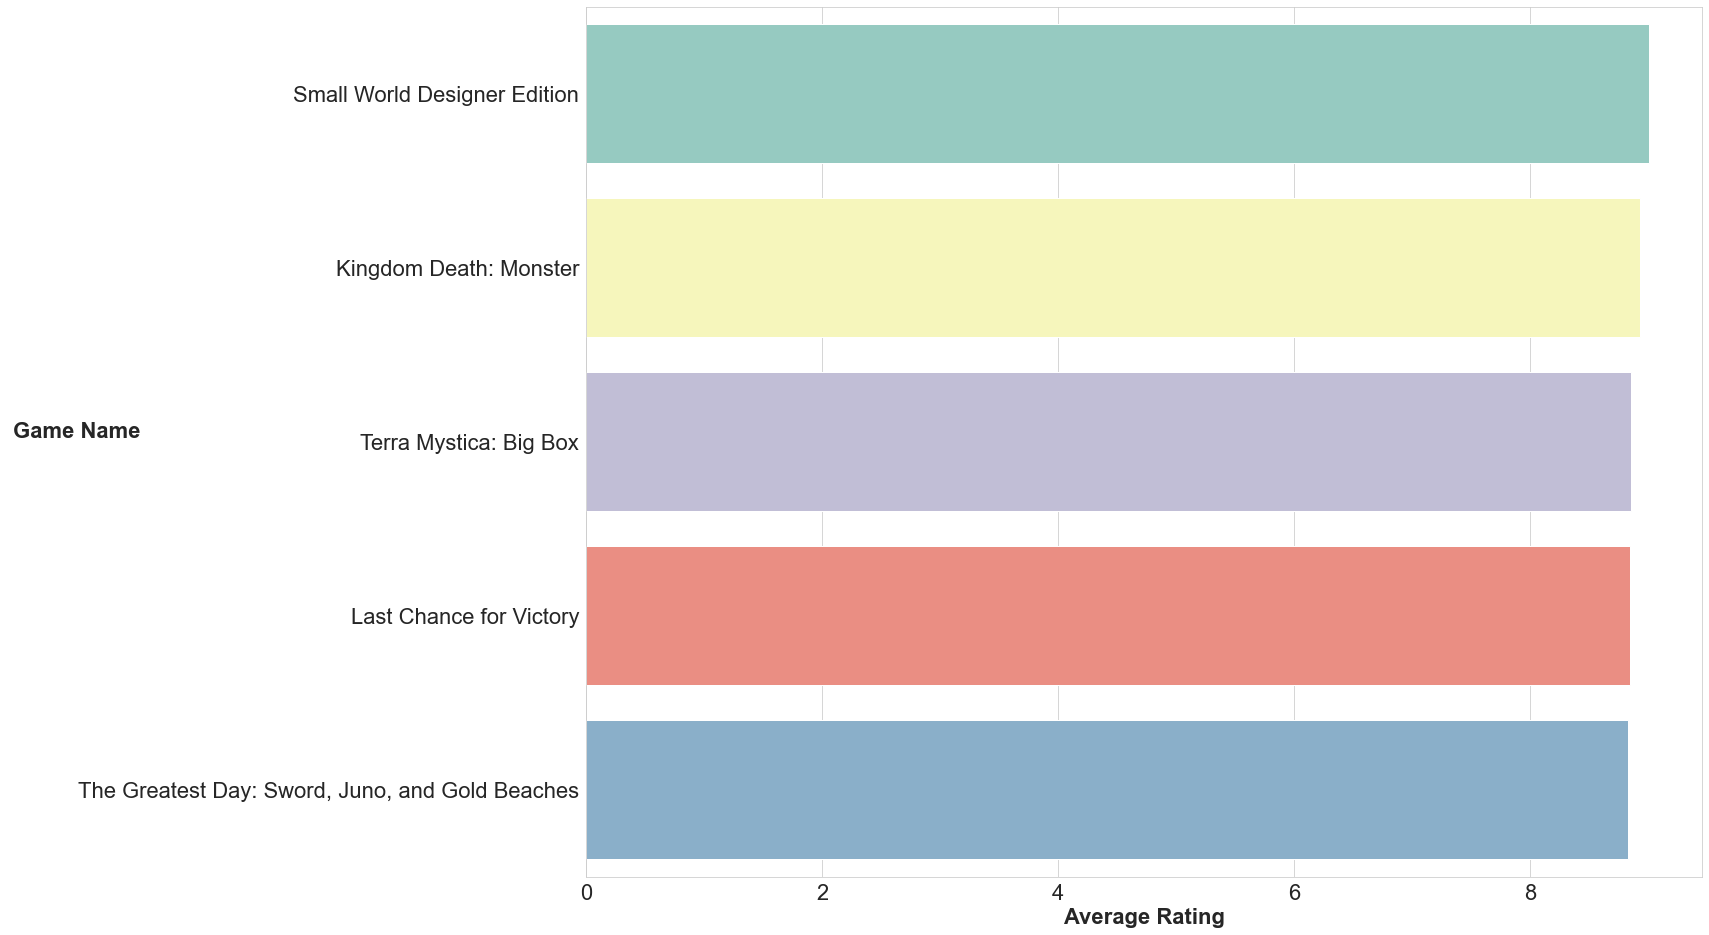

In [20]:
plt.figure(figsize=(20, 16))
# set the background style of the plot
sns.set_style('whitegrid')

 
# plot the graph using the default estimator mean
sns.barplot(x ='average_rating', y ='name', data = sorted_game_ratings, palette="Set3")

plt.xticks(fontsize=22)
plt.xlabel(xlabel ='Average Rating',fontsize=22, fontweight='bold')
plt.yticks(fontsize=22)
plt.ylabel(ylabel =' Game Name',fontsize=22, fontweight='bold', rotation='horizontal')

plt.show()

#### Correlation  between “users_rated” and the “max_playtime

Then we can check for a correlation between “users_rated” and the “max_playtime features, we can do this using the pandas .corr(). This will check for correlations between each pair of columns in the dataset but can be tuned to look at only 2 columns as in this case the entire dataset is not needed. One further note is that there are several methods of calculating correlation, by default the Pearson method whose formula is listed below is used (rasbt, 2014). This returns a value between -1 and 1 and as the correlation coefficient heads to either it becomes stronger either positive or negative, for example -0.9 would be strongly negative in its correlation whereas 0.06 would have weak positive correlation, 0 in this case implies no correlation.


## $$ \rho _{XY} = corr(X, Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$
## $$ \rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} $$

In [21]:
# Create a copy of the dataset to work on
correlation_data = data.copy()

Examine all the correlations in the dataset

In [22]:
data_correlation = data.corr().style.background_gradient(cmap='YlOrRd')
data_correlation

Heatmaps are also used regularly to demonstrate the strength of a relationship, here is a heatmap for the entire dataset

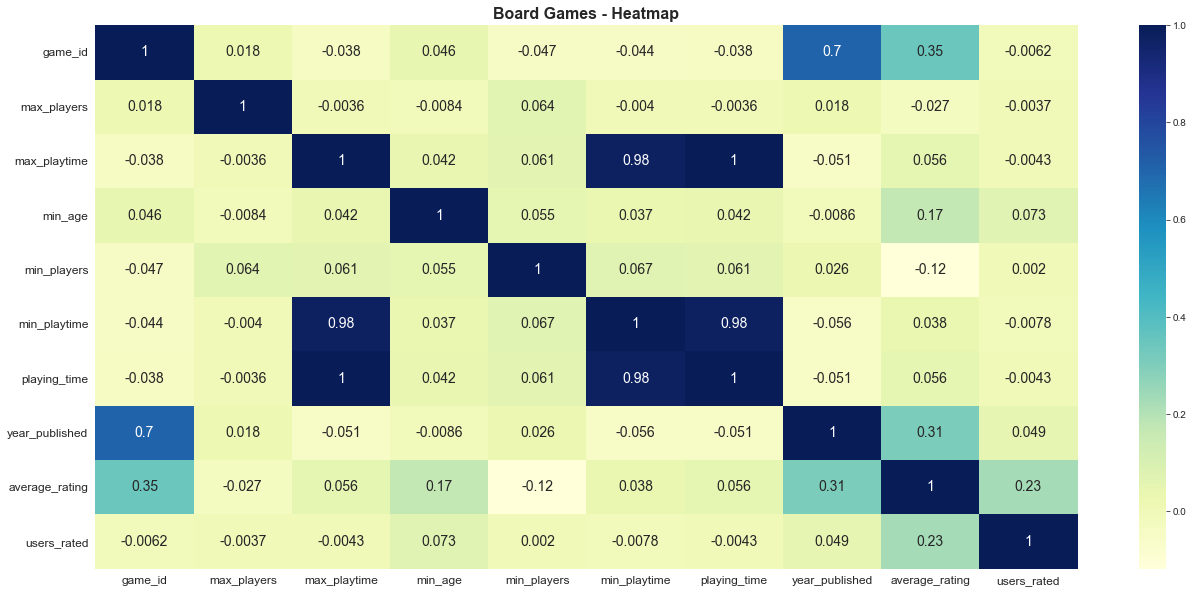

In [23]:
plt.figure(figsize=(22,10))

sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", annot_kws={'size': 14})
plt.title('Board Games - Heatmap', fontsize=16, fontweight='bold')

plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12)

plt.show()

There should be something noted about the correlation heatmap above, it is the same information repeated twice over as the data is repreated each side of the top-left to bottom-right diagonal. We can eliminate this and make a much better heatmap by applying a masking feature (Thiago Carvalho, 2020). 

In [24]:
ones_mask = np.ones_like(data.corr());
mask = np.triu(ones_mask)
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


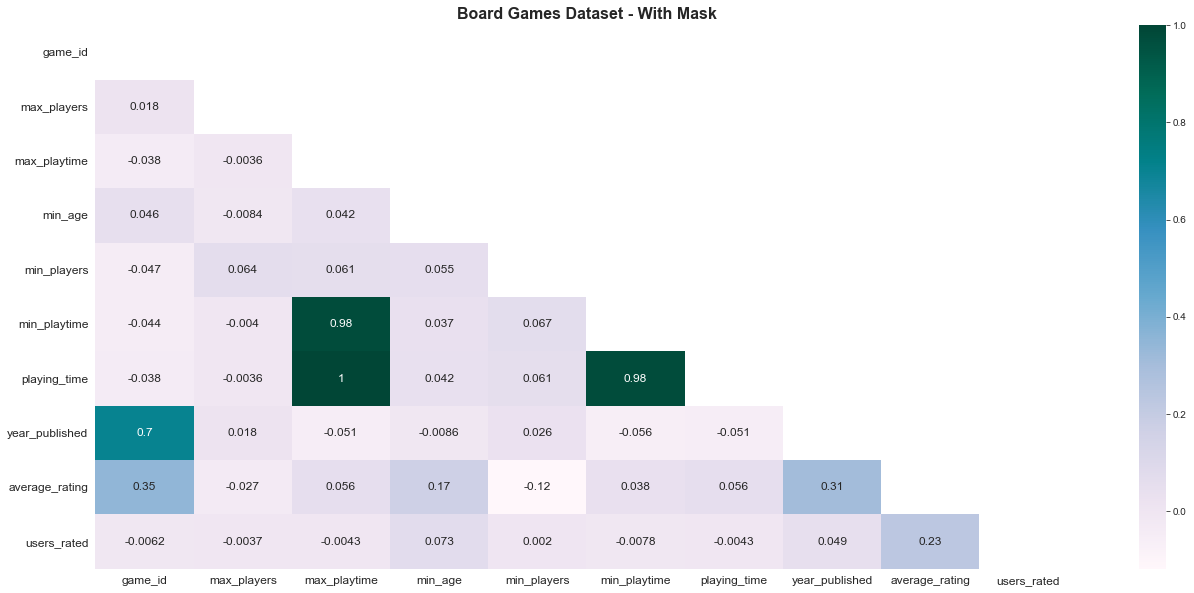

In [25]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(), mask=mask, annot=True, cmap="PuBuGn", annot_kws={'size': 12})
plt.title('Board Games Dataset - With Mask', fontsize=16, fontweight='bold')
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
# Assign each column to a variable 
user_ratings = data['users_rated'] 
playtime = data['max_playtime']

user_ratings.corr(playtime)

-0.004341647333776706

Then use a scatter plot to visualise the correlation and adjust parameters to make more readable including adding the numeric correlation in the title.

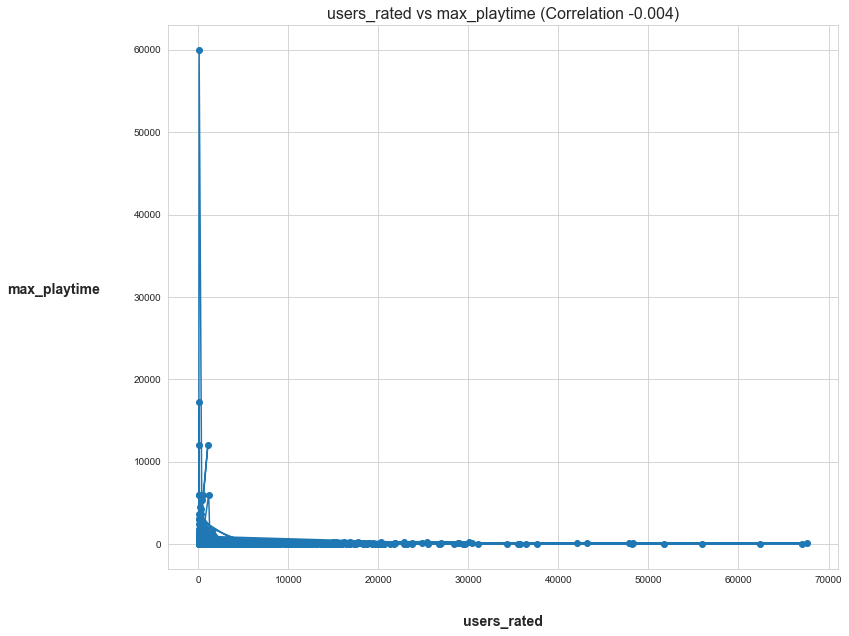

In [27]:
plt.figure(figsize=(12,10))
user_rating_playtime_corr = round(playtime.corr(user_ratings), 3)

# Will show the correlation value in the title
plt.title(f'users_rated vs max_playtime (Correlation {user_rating_playtime_corr})', fontsize=16)
plt.xlabel('users_rated', fontsize=14, fontweight='bold', labelpad=30)
plt.ylabel('max_playtime', fontsize=14, fontweight='bold', labelpad=80, rotation='horizontal')

x=user_ratings
y=playtime

plt.scatter(x, y)
plt.plot(x, y);

##### Find the the distribution of game categories

In [28]:
category_distribution_data = data.copy()

Find the value counts for each game in the category feature

In [29]:
category_groups = category_distribution_data['category'].value_counts()
print(category_groups)

Wargame,World War II                                       449
Card Game                                                  438
Abstract Strategy                                          284
Napoleonic,Wargame                                         124
Economic                                                   116
                                                          ... 
Action / Dexterity,Dice,Pirates                              1
Economic,Fighting,Wargame,World War I                        1
Abstract Strategy,Ancient,Arabian                            1
Adventure,Animals,Educational,Environmental,Exploration      1
Card Game,Economic,Fantasy,Print & Play                      1
Name: category, Length: 3860, dtype: int64


In [30]:
category_groups_top = category_groups.head(20)
category_groups_top

Wargame,World War II              449
Card Game                         438
Abstract Strategy                 284
Napoleonic,Wargame                124
Economic                          116
Card Game,Fantasy                 110
Dice                              107
American Civil War,Wargame         97
Modern Warfare,Wargame             89
Party Game                         77
Ancient,Wargame                    75
Science Fiction,Wargame            66
Action / Dexterity                 55
Fantasy                            54
Wargame,World War I                54
Medieval                           51
Party Game,Trivia                  47
Animals,Card Game                  46
Economic,Trains,Transportation     43
City Building                      43
Name: category, dtype: int64

In [31]:
category_groups_tail = category_distribution_data['category'].value_counts().tail(3700)
category_groups_tail

Nautical                                                   9
Dice,Fantasy,Fighting                                      9
Ancient,City Building                                      9
Card Game,Memory                                           9
Ancient,Civilization                                       9
                                                          ..
Action / Dexterity,Dice,Pirates                            1
Economic,Fighting,Wargame,World War I                      1
Abstract Strategy,Ancient,Arabian                          1
Adventure,Animals,Educational,Environmental,Exploration    1
Card Game,Economic,Fantasy,Print & Play                    1
Name: category, Length: 3700, dtype: int64

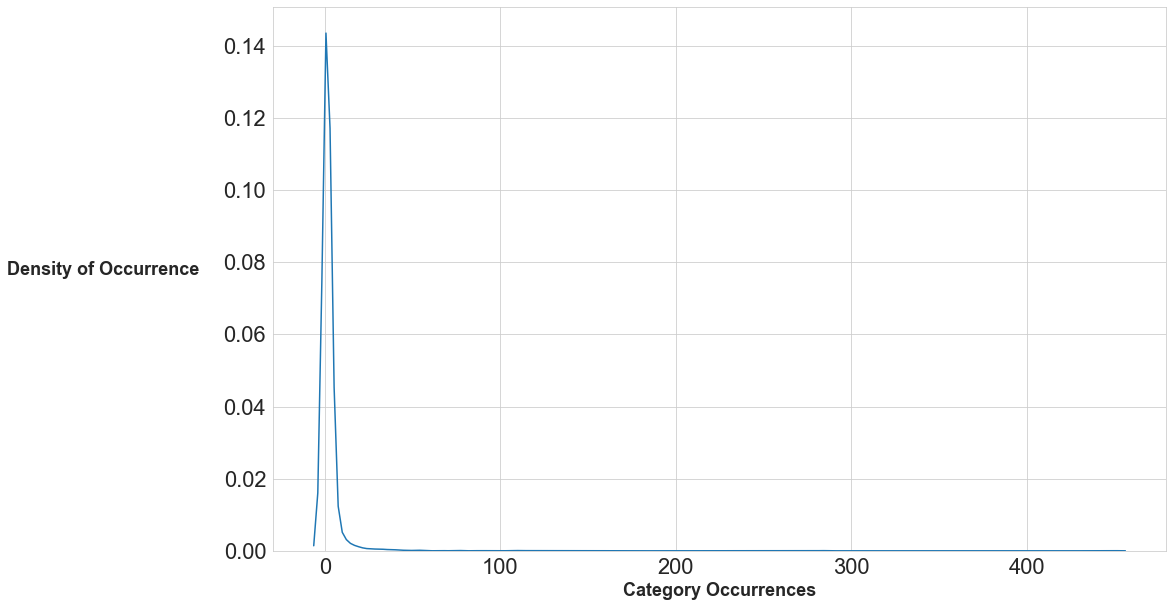

In [32]:
plt.figure(figsize=(16,10))

plt.xticks(fontsize=22)
plt.xlabel(xlabel ='Category Occurrences',fontsize=18, fontweight='bold')
plt.yticks(fontsize=22)
plt.ylabel(ylabel = 'Density of Occurrence',fontsize=18, fontweight='bold', labelpad=120, rotation='horizontal')

sns.kdeplot(category_groups); 

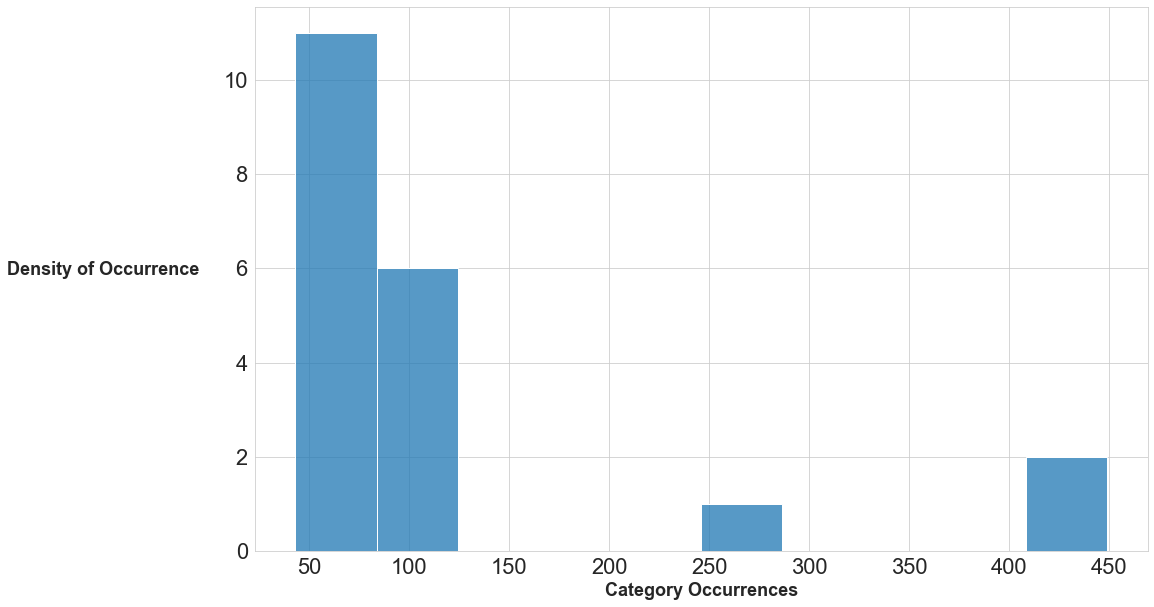

In [33]:
plt.figure(figsize=(16,10))

plt.xticks(fontsize=22)
plt.xlabel(xlabel ='Category Occurrences',fontsize=18, fontweight='bold')
plt.yticks(fontsize=22)
plt.ylabel(ylabel = 'Density of Occurrence',fontsize=18, fontweight='bold', labelpad=120, rotation='horizontal')

sns.histplot(category_groups_top); 

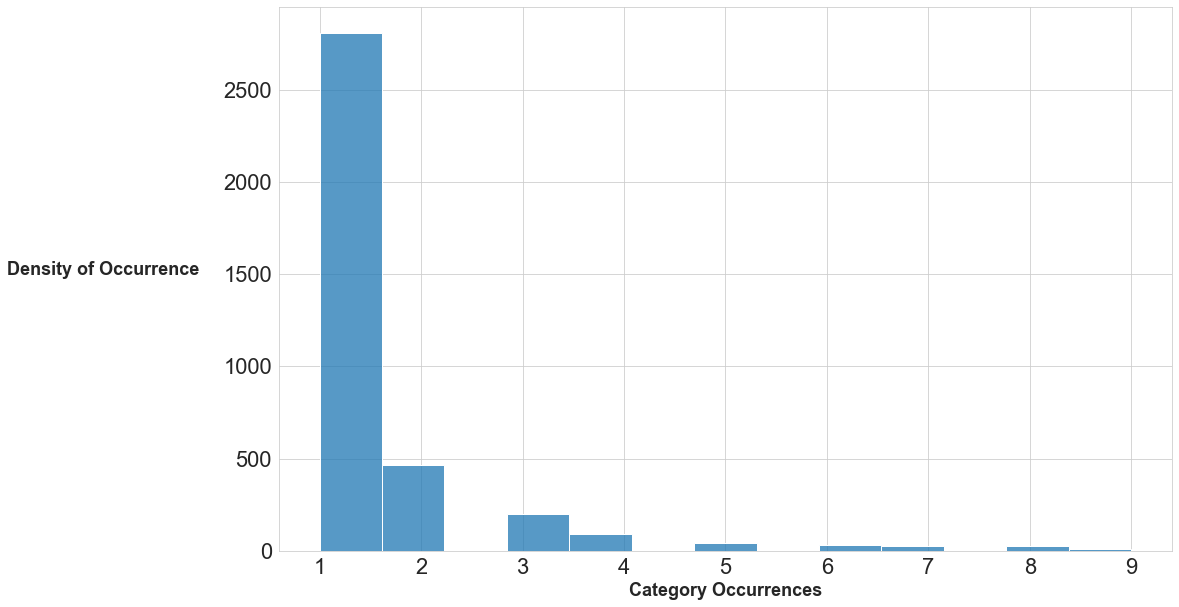

In [34]:
plt.figure(figsize=(16,10))

plt.xticks(fontsize=22)
plt.xlabel(xlabel ='Category Occurrences',fontsize=18, fontweight='bold')
plt.yticks(fontsize=22)
plt.ylabel(ylabel = 'Density of Occurrence',fontsize=18, fontweight='bold', labelpad=120, rotation='horizontal')

sns.histplot(category_groups_tail);

#### Do older games (1992 and earlier) have a higher MEAN “average rating” ?

In [35]:
game_age_data = data.copy()

Start by looking at the over all column mean and then the 2 separate mean values

In [36]:
total_average_mean = game_age_data['average_rating'].mean()
total_average_mean

6.370855970376001

Create pivot table to hold only the 'year_published' and 'average_rating' columns (Analytics Vidhya, 2020)

In [37]:
game_age_data.drop(['game_id','max_players','max_playtime', 'min_age', 'min_players', 'min_playtime', 'playing_time', 'users_rated'],inplace=True,axis=1)

table = pd.pivot_table(data=game_age_data,index=['year_published'])
table

average_rating
year_published                
1950                  5.758538
1951                  5.711550
1952                  5.680623
1953                  4.639980
1954                  5.654670
...                        ...
2012                  6.557838
2013                  6.604258
2014                  6.739433
2015                  6.871425
2016                  7.097521

[67 rows x 1 columns]

Using the query syntax (as seen in class), split the values into 1992 and before for older games and later for newer games and then check the mean value of each section.

In [38]:
older_games = table.query('year_published <= 1992')
older_games

average_rating
year_published                
1950                  5.758538
1951                  5.711550
1952                  5.680623
1953                  4.639980
1954                  5.654670
1955                  5.829650
1956                  5.967277
1957                  4.790390
1958                  5.516510
1959                  5.840940
1960                  5.751770
1961                  5.771183
1962                  5.682643
1963                  5.800577
1964                  5.829588
1965                  5.134547
1966                  5.667481
1967                  5.842019
1968                  5.598530
1969                  5.876256
1970                  5.658401
1971                  5.758058
1972                  5.936253
1973                  5.948488
1974                  6.017823
1975                  6.018865
1976                  6.078291
1977                  6.096589
1978                  6.118038
1979                  6.140812
1980                  6.149115
1981                  6.137535
1982                  5.959189
1983                  6.132915
1984                  6.145346
1985                  6.204703
1986                  6.154022
1987                  5.995271
1988                  5.943532
1989                  6.056441
1990                  5.993870
1991                  6.101882
1992                  6.179713

In [39]:
older_games_mean = older_games.mean()
older_games_mean

average_rating    5.843485
dtype: float64

In [40]:
newer_games = table.query('year_published > 1992')
newer_games

average_rating
year_published                
1993                  6.062946
1994                  6.173751
1995                  6.233942
1996                  6.007192
1997                  6.171736
1998                  6.041098
1999                  6.124109
2000                  6.017291
2001                  6.079255
2002                  6.081348
2003                  6.138103
2004                  6.128115
2005                  6.192303
2006                  6.164576
2007                  6.222444
2008                  6.378399
2009                  6.433263
2010                  6.557958
2011                  6.547597
2012                  6.557838
2013                  6.604258
2014                  6.739433
2015                  6.871425
2016                  7.097521

In [41]:
newer_games_mean = newer_games.mean()
newer_games_mean

average_rating    6.317746
dtype: float64

Generate visualisation, start by creating a new dataframe holding the 3 mean values

In [42]:
mean_values_dictionary = {
    'Mean' : ['Newer Games', 'Older Games', 'Total Games Mean'],
    'Mean Value' : [6.317746, 5.843485, 6.370855],
}

In [43]:
mean_dataset = pd.DataFrame(mean_values_dictionary)

Using matplotlib bar labels requires a version above 3.4, see Additional Notes

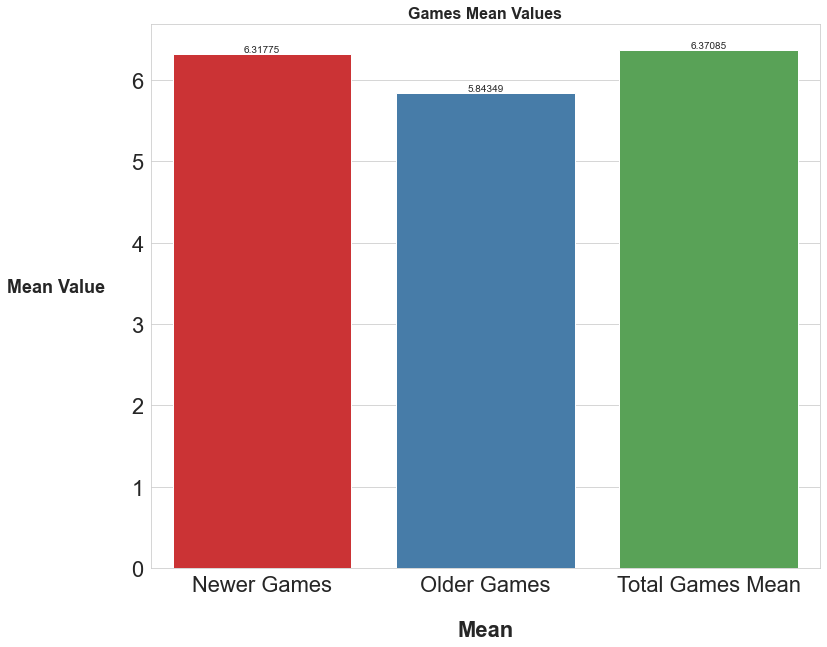

In [44]:
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')

plt.title('Games Mean Values', fontsize=16, fontweight='bold')
plt.xticks(fontsize=22)
plt.xlabel(xlabel = 'Mean Name', fontsize=22, fontweight='bold', labelpad=25)
plt.yticks(fontsize=22)
plt.ylabel(ylabel = 'Mean Value',fontsize=18, fontweight='bold', labelpad=75, rotation='horizontal')

bar_plot = sns.barplot(x ='Mean', y ='Mean Value', data = mean_dataset, palette="Set1")
plt.bar_label(bar_plot.containers[0])

plt.show()

#### What are the 3 most common “mechanics” in the dataset?

Use the mechanic feature from the dataset and count the values using value_counts()

In [3]:
# Create dataset copy
mechanic_data = data.copy()

In [4]:
mechanics = mechanic_data['mechanic']
top_mechanics = mechanics.value_counts().head(5)
top_mechanics

Hex-and-Counter         523
Hand Management         297
Dice Rolling            222
Roll / Spin and Move    199
Tile Placement          170
Name: mechanic, dtype: int64

Using the Plotly library to generate barplot

In [6]:
fig = px.bar(top_mechanics, orientation='h');

fig.update_layout(
    title="Most Common Mechanics",
    xaxis_title="Amount",
    yaxis_title="Mechanic",
    title_x=0.5,
    font=dict(
        family="Times New Roman",
        size=18
    )
)

# plotly.offline.iplot(fig, filename='mechanic_plot')
fig.write_image("fig_mechanics.png")

fig.show();


## <center>Part 2</center>

##### If we are to answer a 'Statistically Relevant' question then must first find out what are the most relevant and influential columns in the dataset.

In [48]:
# Create a dataset copy
data_part2 = data.copy()

There are a few different ways of finding the most important features in a dataset, the simplest is to use the correlation feature and is referred to as the filter method Abhini Shetye (2019). Unlike the previous correlation this time it will be conditional i.e. columns must have a correlation above a certain value to be useful, for this example I will consider only positive correlations useful.

In [49]:
data_part2_correlation = data_part2.corr()
data_part2_correlation

game_id  max_players  max_playtime   min_age  min_players  \
game_id         1.000000     0.017927     -0.037511  0.046359    -0.047049   
max_players     0.017927     1.000000     -0.003646 -0.008389     0.063518   
max_playtime   -0.037511    -0.003646      1.000000  0.041610     0.060724   
min_age         0.046359    -0.008389      0.041610  1.000000     0.054614   
min_players    -0.047049     0.063518      0.060724  0.054614     1.000000   
min_playtime   -0.044301    -0.004041      0.975336  0.037476     0.067274   
playing_time   -0.037511    -0.003646      1.000000  0.041610     0.060724   
year_published  0.704302     0.017946     -0.051373 -0.008630     0.026440   
average_rating  0.345837    -0.026564      0.056439  0.167772    -0.117876   
users_rated    -0.006245    -0.003682     -0.004342  0.073209     0.001996   

                min_playtime  playing_time  year_published  average_rating  \
game_id            -0.044301     -0.037511        0.704302        0.345837   
max_players        -0.004041     -0.003646        0.017946       -0.026564   
max_playtime        0.975336      1.000000       -0.051373        0.056439   
min_age             0.037476      0.041610       -0.008630        0.167772   
min_players         0.067274      0.060724        0.026440       -0.117876   
min_playtime        1.000000      0.975336       -0.055729        0.037745   
playing_time        0.975336      1.000000       -0.051373        0.056439   
year_published     -0.055729     -0.051373        1.000000        0.308353   
average_rating      0.037745      0.056439        0.308353        1.000000   
users_rated        -0.007752     -0.004342        0.048722        0.227655   

                users_rated  
game_id           -0.006245  
max_players       -0.003682  
max_playtime      -0.004342  
min_age            0.073209  
min_players        0.001996  
min_playtime      -0.007752  
playing_time      -0.004342  
year_published     0.048722  
average_rating     0.227655  
users_rated        1.000000

Then use the average_rating feature as a target, drop from the results as a feature will always have a perfect correlation with itself.

In [50]:
#Correlation with output variable
data_part2_correlation_target = abs(data_part2_correlation["average_rating"])
new_data_table = data_part2_correlation_target[data_part2_correlation_target>0.0].drop('average_rating')
new_data_table

game_id           0.345837
max_players       0.026564
max_playtime      0.056439
min_age           0.167772
min_players       0.117876
min_playtime      0.037745
playing_time      0.056439
year_published    0.308353
users_rated       0.227655
Name: average_rating, dtype: float64

In [51]:
type(new_data_table)

pandas.core.series.Series

Check the relationship between numerical features visually in a dataset using the parallel coordinates plot from the plotly express library (Darío Weitz, 2021a). We can use MinMaxScaler if wanted as there are numerous different scales being used in the dataset and this scales all values to between 0 and 1.

In [52]:
# https://towardsdatascience.com/parallel-coordinates-plots-with-plotly-dffe3f526c6b
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

We will need to select the data types to be looked at using the select_dtypes feature from Pandas. This will allow selection of multiple columns. After that then there will need to be a conversion from a numpy array back to a dataframe which can take the column names as a parameter (Datatofish.com, 2020).

In [53]:
data_numerical = data_part2.select_dtypes(include=['float64', 'int64'])

data_numerical_scaled = scaler.fit_transform(data_numerical)

pd.DataFrame(data_numerical_scaled, columns = [
            'game_id', 'max_players', 'max_playtime', 'min_age', 'min_players', 
            'min_playtime', 'playing_time', 'year_published', 'average_rating',
            'users_rated'
       ])

game_id  max_players  max_playtime   min_age  min_players  \
0      0.000000     0.005005      0.004000  0.333333     0.333333   
1      0.000005     0.004004      0.000500  0.285714     0.333333   
2      0.000009     0.004004      0.001000  0.238095     0.222222   
3      0.000014     0.004004      0.001000  0.285714     0.222222   
4      0.000018     0.006006      0.001500  0.285714     0.333333   
...         ...          ...           ...       ...          ...   
10527  0.992022     0.002002      0.008000  0.285714     0.111111   
10528  0.994057     0.005005      0.000750  0.309524     0.222222   
10529  0.994214     0.004004      0.000333  0.285714     0.222222   
10530  0.997582     0.006006      0.002000  0.285714     0.222222   
10531  1.000000     0.005005      0.001000  0.333333     0.111111   

       min_playtime  playing_time  year_published  average_rating  users_rated  
0          0.004000      0.004000        0.545455        0.824293     0.065794  
1          0.000500      0.000500        0.469697        0.685583     0.006331  
2          0.000500      0.001000        0.727273        0.794910     0.177043  
3          0.001000      0.001000        0.636364        0.685399     0.003905  
4          0.001500      0.001500        0.212121        0.784031     0.224022  
...             ...           ...             ...             ...          ...  
10527      0.000500      0.008000        1.000000        0.914617     0.000370  
10528      0.000750      0.000750        1.000000        0.879770     0.000473  
10529      0.000333      0.000333        1.000000        0.773776     0.000192  
10530      0.000333      0.002000        1.000000        0.797209     0.004304  
10531      0.000500      0.001000        1.000000        0.806487     0.001021  

[10532 rows x 10 columns]

After scaling add the parallel coordinates visualisation to show the relationship between the numeric columns, in this particular case using the untransformed data as it gives more information than the rescaled results do.

In [54]:
px.parallel_coordinates(data_numerical, title='Numerical Data Relationship')

#### Regressions and Predictions

Using a simple linear regression to check the relationship between the dataset values that we have calculated to be the most important. Then checking to see if predictions can be made 

#### <center>Linear Regression</center> 

In [55]:
data_regression = data.copy()

In [56]:
# Select columns that will be X and Y
X = data_regression.loc[:, ['users_rated']].values
y = data_regression.loc[:, ['average_rating']].values

Show the values in X and y

In [57]:
print(X)

[[ 4498]
 [  478]
 [12019]
 ...
 [   63]
 [  341]
 [  119]]


In [58]:
print(y)

[[7.66508]
 [6.60815]
 [7.44119]
 ...
 [7.28016]
 [7.45871]
 [7.52941]]


Splitting the data into a Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Import the LinearRegression module from the Sklearn library and then fit it to the X and y values

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [61]:
y_pred = regressor.predict(X_test)

Visualise the Training set results

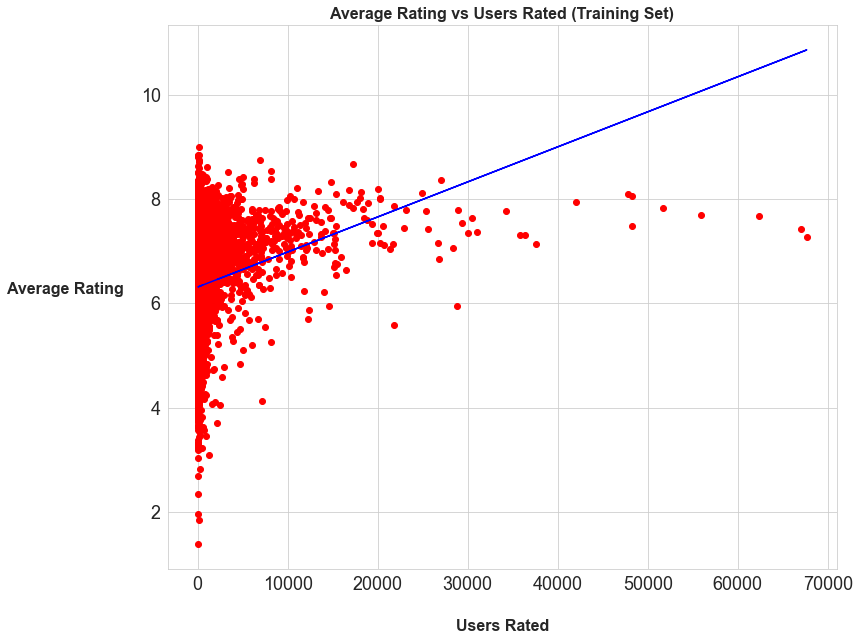

In [62]:
plt.figure(figsize=(12,10))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Rating vs Users Rated (Training Set)', fontsize=16, fontweight='bold')

plt.xticks(fontsize=18)
plt.xlabel(xlabel = 'Users Rated', fontsize=16, fontweight='bold', labelpad=25)
plt.yticks(fontsize=18)
plt.ylabel(ylabel = 'Average Rating',fontsize=16, fontweight='bold', labelpad=75, rotation='horizontal')
plt.show()

Visualising the Test set results

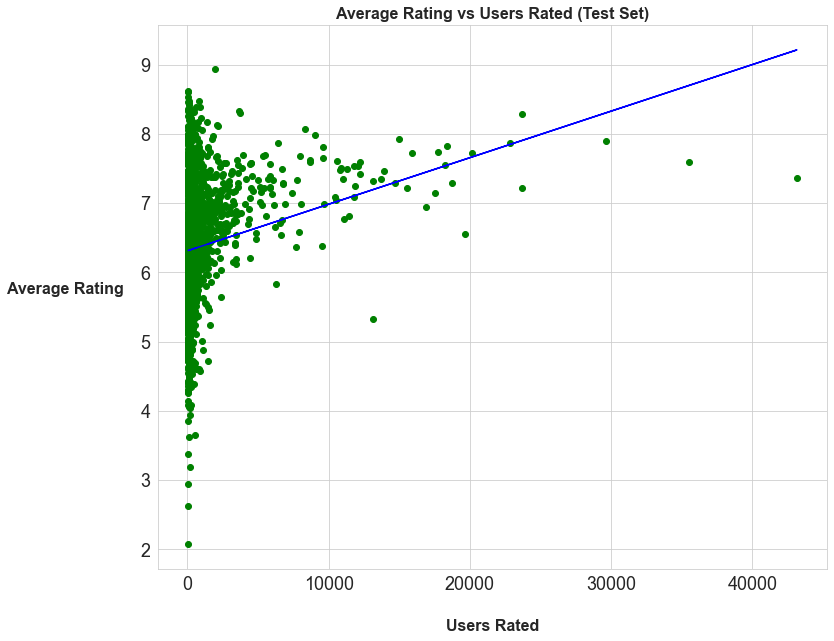

In [63]:
plt.figure(figsize=(12,10))
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Average Rating vs Users Rated (Test Set)', fontsize=16, fontweight='bold')

plt.xticks(fontsize=18)
plt.xlabel(xlabel = 'Users Rated', fontsize=16, fontweight='bold', labelpad=25)
plt.yticks(fontsize=18)
plt.ylabel(ylabel = 'Average Rating',fontsize=16, fontweight='bold', labelpad=75, rotation='horizontal')

plt.show()

Calculate the precision of the algorithm

In [64]:
print('Precision of the model:')
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

Precision of the model:
0.049926326624056494
0.05910046659835688


#### <center>Predictions</center> 

Then check to see if predictions can be made using the selected columns.

Using the Support Vector Machine technique to predict what will be the average rating of games using user input parameters.

Create a copy of the data.

In [65]:
data_svm = data.copy()

In [66]:
data_svm = data_svm.dropna()

Select the different values that are wanted for each axis.

In [67]:
X = data_svm.loc[:, ['max_players', 'max_playtime', 'playing_time', 'average_rating', 'users_rated']].values
y = data_svm.loc[:, ['category']].values

Split the data into test and training portions.

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Then apply scaling to the data.

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train the SVM model on the Training set


In [70]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train.ravel())

SVC(kernel='linear', random_state=0)

Generate a prediction of the game category using the input parameters

In [71]:
print(classifier.predict(sc.transform([[4, 720, 360, 7.5, 15000]])))

['Renaissance']


Predicting the Test set results

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.04878048780487805

## <center> Part 3 - Explanations</center>                                                   

### <center> Data Exploration</center> 

I will begin my explanation of why I chose to perform certain actions at the start of the file. At first there is the usual procedure to install and import needed libraries and the dataset needed, I will make a copy of the dataset and use that for analysis. After that then is when an exploration of the dataset begins, to gain familiarity with what the dataset contains and what we may need to do to be able to use this dataset properly. 

There are many different methods that can be used in this exploration but all of them use the same functions to find information just in a different order. We need to see how many columns there are and what type of data they contain which we do by using the .info() method. We also need to see the dimensions of the dataset, this is done using the shape attribute, note this is not a function so there are no brackets needed.

After seeing the shape of the data it is time to check for any missing values, which is done by using the isnull() function, if there are any missing or NaN values we can check each column for these using isnull() with the dataset as a parameter followed by the any() function which is chained on and returns a true or false value for any null values being returned. Then we can count any null values both on a column or feature basis as well as for the total dataset simply by using sum() or using sum() twice for a dataset total. Below is just a single image of the info() function and what information it returns as an example of the analysis performed.

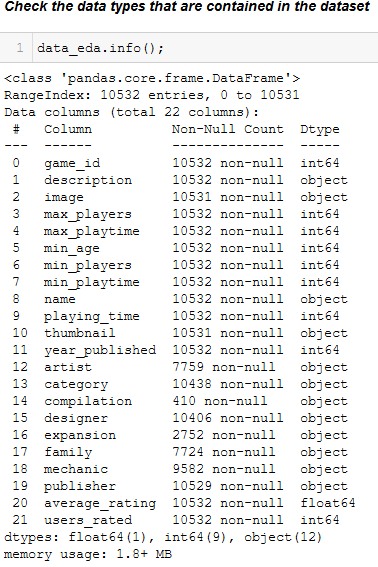

I also am of the opinion that visualising whether columns have missing values or not will have some extra value in showing the completeness of the dataset. With this in mind I have installed the Missingno library (ResidentMario, 2021) which contains a matrix plot which will show the dataset and its missing values. This visualisation takes parameters which will help increase it's effectiveness, firstly the dataset is added in, then I increased both the figure size and the font size to aid legibility. There is a sparkline which is displayed by default vertically beside the dataset but in this case was not of any relevance so I set it to false. The final parameter that I set is the color parameter, if there is no color set then the matrix will display in black and white which may lessen any impact due to being surrounded by black and white text so I decided to change it. The colour I decided to use to make it contrast with it's surroundings is a blue colour, the parameter itself takes 3 values all of which are set to bewteen 0 and 1. The library itself is an excellent source of plots to visualise dataset completeness which a lot of times is done without any visualisation. I feel as though using the matrix plot rather than other available plots such as bar charts and heatmaps demonstrates the completeness of the dataset in a very easy to understand manner and shown in the image below.

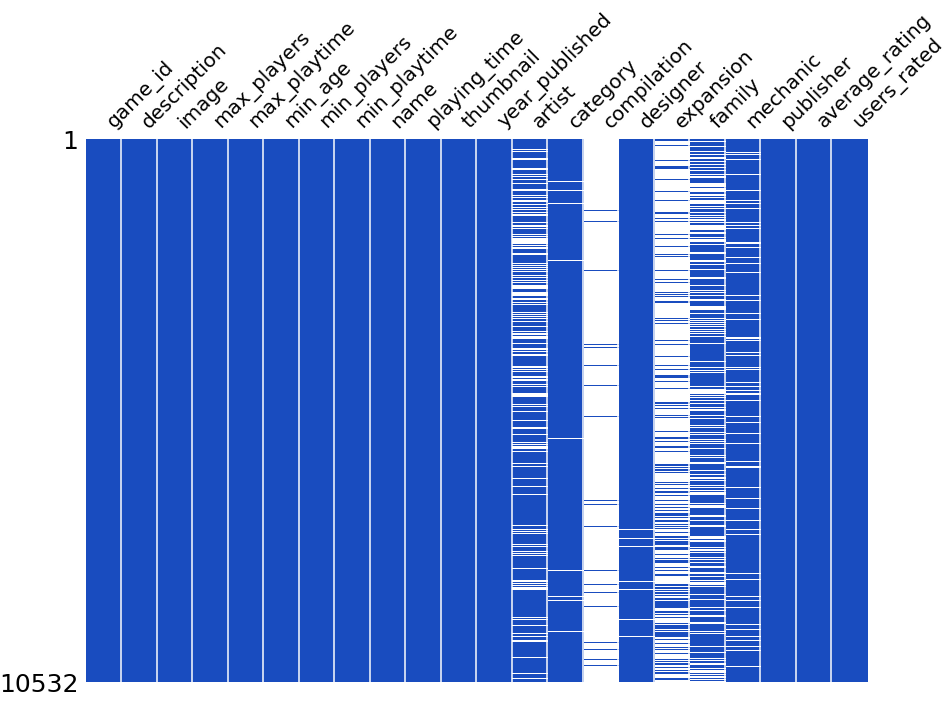

Next is Part 1 which contains several questions, for each of these I will make a copy of the original unaltered dataset to perform calculations on, I do this as it means that if there are any issues with my calculations then it is only a copy of the dataset that is used which can be replaced, I will also continue with that practice in Part 2. I will also use screenshots of graphs and calculations that have been performed above to illustrate my analysis rather than adding a second copy of the code which will then need to be run each time.

### <center> Part 1</center> 

###### Part 1 - Top 5 Average Rated Games 

If we move on then to Part 1, the first question that needed to be answered concerned finding top 5 average rated games from the dataset. This is relatively straight forward as we only need a couple of columns, in this case 'name' and 'average_rating'. After fetching the columns then the average ratings for games need to be sorted using the sort_values() function, the ascending parameter of this function needs to be set to false as the highest values need to be at the top. After this then it is only a matter of chaining on the head() function which can be left without setting parameters to show the top 5 average rated games.

Then it is time to show how this looks on a plot which in this case will be a Seaborn based bar chart (Pydata.org, 2012a). I decided to use the name column as the y axis as it would mean that I could use the horizontal version of the barplot which would both accomodate the full name of the game as well as the average rating value. When setting parameters I did so with both readability in mind and the need to ensure that the plot contrasted with surroundings. 
I used the Set3 colour palette as the colours gave good contrast with each other and the rest of the page. I increased both the x-tick and y-tick font sizes using matplotlib to make them more readable and did the same with the axis labels which I also changed to bold using the fontweight parameter so that they are differentiated from the axis tick values. I used the rotation parameter on the y-label which I set to horizontal again for readability as this is more readable than horizontal. 

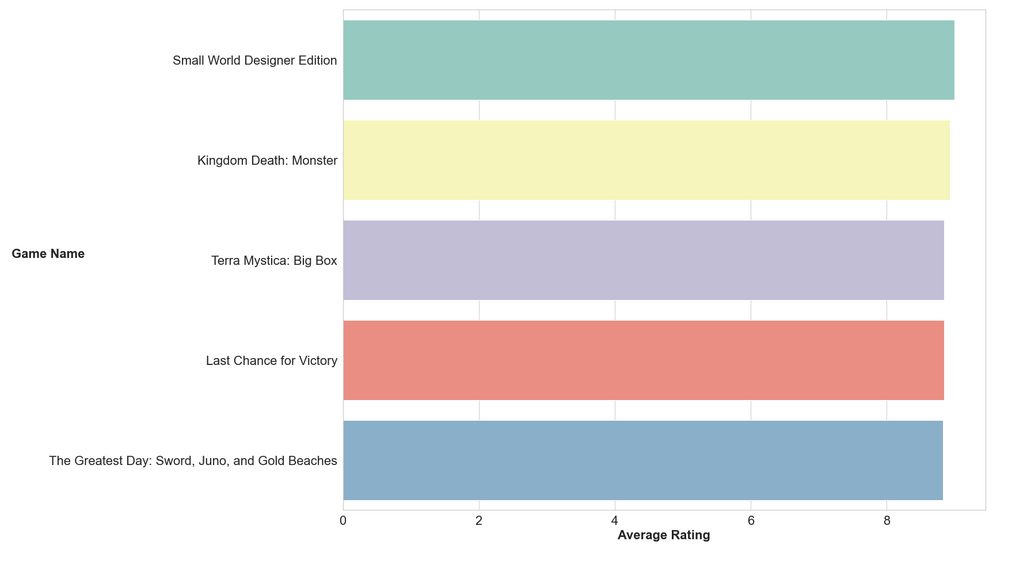

###### Part 1 - Correlation

In the second question of Part 1 we are asked to look at the correlation between 2 features, in this case the 'users_rated' and 'max_playtime' features. To start with I decided to look at the correlations for the entire table as I think that it will be useful knowledge to have during the assignment. I started off by using a correlation table and added a background gradient style, in this case 'YlOrRd' which comes from the matplot sequential colormaps (Matplotlib.org, 2012) section and displays the table colorised to show relationship intensities. 
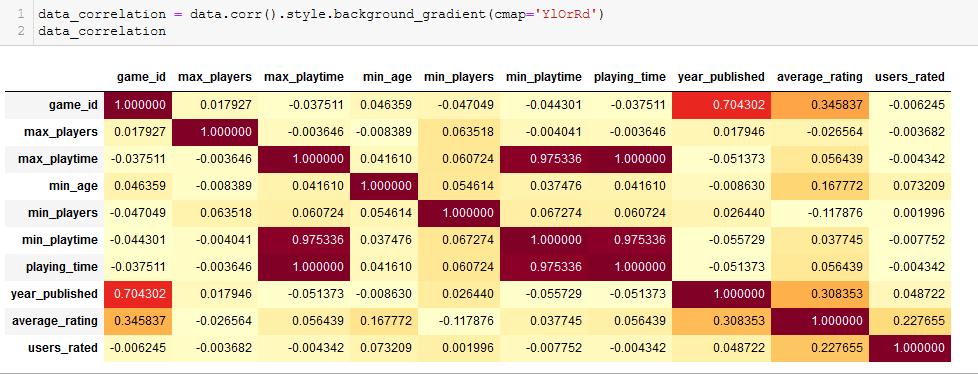


Then I added a heatmap to graphically demonstrate the relationships of the features in the dataset, I added a couple of parameters firstly using the 'YlGnBl' cmap styling to both accurately display relationships but also contrast with the correlation table coloring. Next is to display the numerical values within the graphic which I feel works well in concert with the graphic theme, as Seaborn is uses to generate the heatmap we can access that functionality so I set both the annot parameters, the first is set to true to display text values in the appropriate cell and annot_kws parameter allows for sizing the text values(Pydata.org, 2012). The final adjustment that I felt needed to be done was using the matplotlib functionality to display x-axis values horizontally rather than vertically to aid readability and I adjusted the figure size so that there would be no overwriting of feature names and the result is seen below.

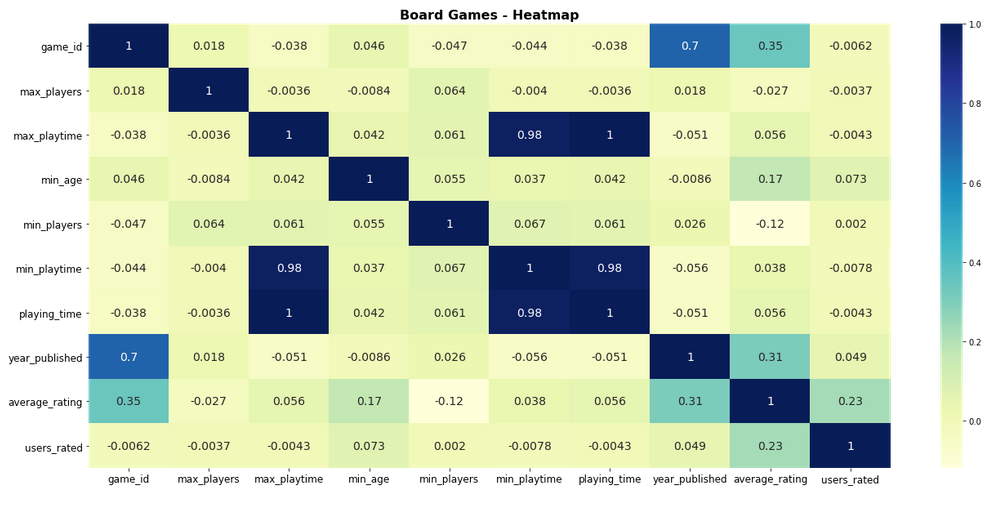

After doing a basic heatmap it is slightly misleading as the same data is repeated twice so in order to correct this half of the heatmap must be eliminated from the plot, this is done utilising a mask (Thiago Carvalho, 2020) using the Numpy ones_like() function which creates a matrix of boolean values the same shape as the dataframe being used, in conjunction with this is the triu() function which returns only the upper triangle of the matrix and has the effect of blanking or masking out the duplicate data in the heatmap, again the figure size and text is adjusted to more legible values as well as the cmap coloring being set to 'PuBuGn' which again shows visually the intensity of the correlation value but contrasts with previous plots.

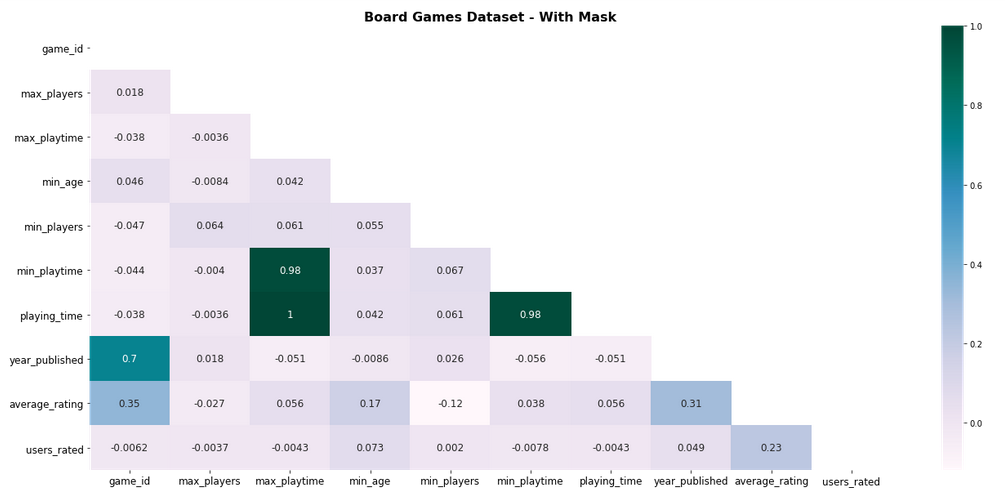

After looking at correlation in general now it is time to look at the correlation between the 2 features, in this case the features are 'users_rated' and 'max_playtime'. The inbuilt corr() function is used to check how these 2 features correlate with one another. The answer in this case is -0.004341647333776705 or a slight negative correlation. This can be viewed using a scatter plot for a graphic representation of correlation, again there are parameters that can be adjusted to make more information available and easily comprehended. 

The first parameter to be set in this visualisation is in the title where I decided to include the calculated correlation value, I did this by using string interpolation or f-strings in Python (GeeksforGeeks, 2018) which allows expressions in a string so we can display the calculation by assigning to a variable and using the variable in the f-string. Then as previously I increased font size for labels and axis ticks, I also rotated the y-axis label to horizontal for clarity and set fontweight to bold to increase the contast between labels and other items in the plot. Finally I used the labelpad parameter on both axis labels as it will again help labels standout from axis ticks.

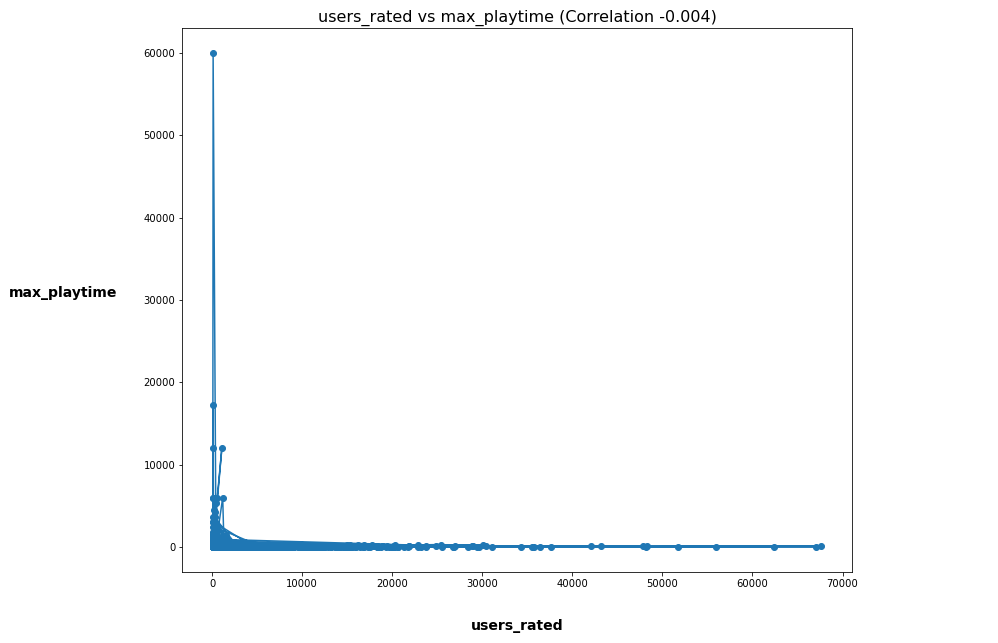

###### Part 1 - Distribution of Game Categories

The first operation that I performed when looking at the distribution of 'category' was to apply the value_counts() function which will count the number of occurences of each value in the 'category' feature. This will return the values in a descending order by default although that can be changed by seting the parameter to false which can be seen in the below image
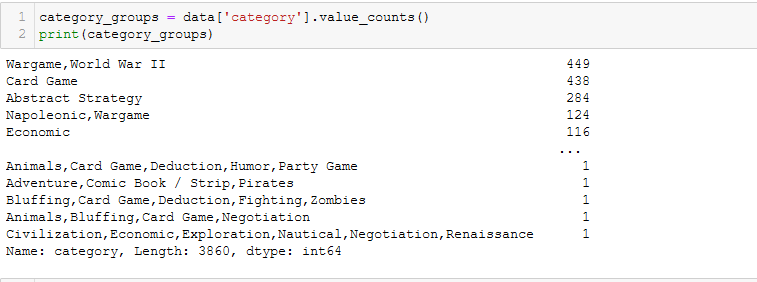

After this then I decided to look at the top 20 values using the head() function with the paramater set to 20, the result can be seen here.
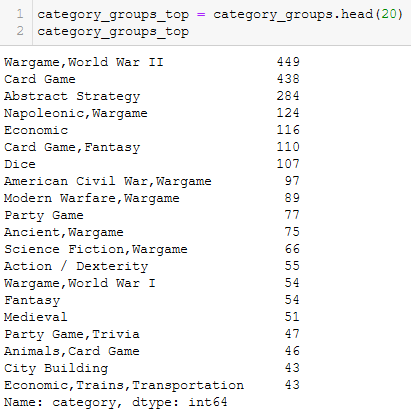

At this point I decided to look at the tail values and over 3700 of the 3860 values returned by the value_counts() function have less than 10 values. This is shown below

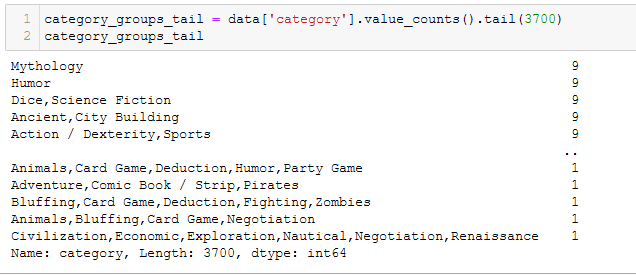

This shows that there is going to be a skewing of the distribution as there are reltively few high values but a lot of low values. It was here that I decided to use both the Seaborn histplot visualisation (Pydata.org, 2012b) which I will use for only parts of the dataset as there are too many categories for a histogram to plot and the Seaborn kdeplot (Pydata.org, 2012d) which I use because it displays the distribution of all categories in an easy to see scale. As usual I added some parameters to help the plot convey it's information easier and quicker. I started off by increasing the plot size, the font size of both the x and y ticks as well as the axis labels. Again I set the y-axis label to be displayed horizontal as this makes it more readable and I also set the labelpad parameter which puts spacing or padding between the axis label and the axis ticks in order to prevent overwrite. 

The y-axis displays the density of occurrences which in this case is a proportion of the total between 0 and 1 and the x-axis displays the category of the values which is the number of times that the value occurred, for example a large proportion of the data occurs 1 time and that shows in the left hand skewing of the data curve in the image below, there are larger values which also explains the right sided tail of the curve.

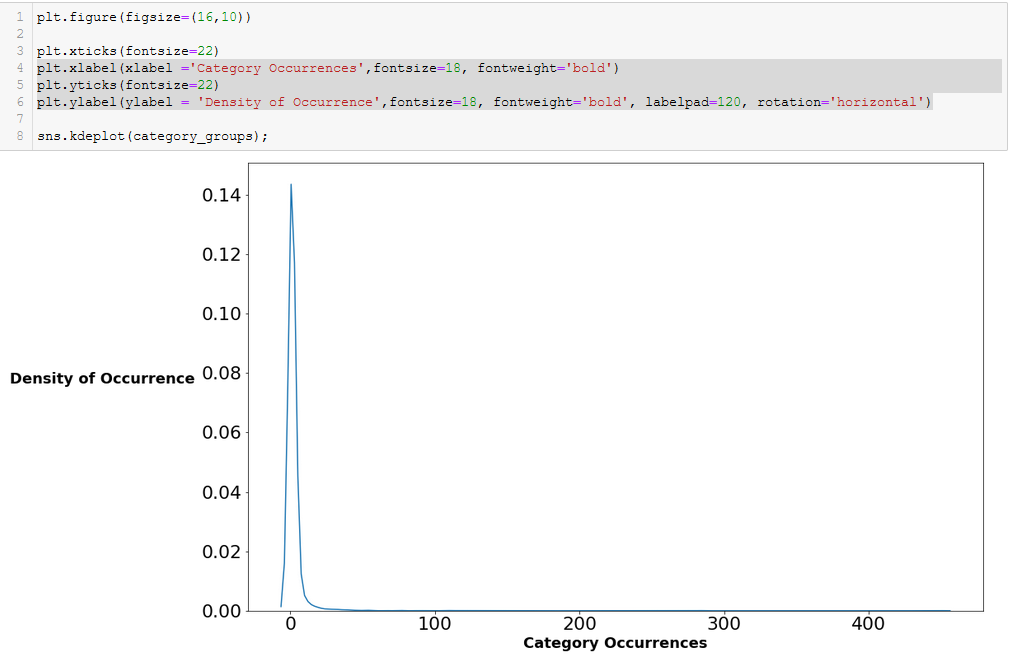

After this I decided to plot 2 histograms, 1 showing the top 20 values distributed and the other showing how the distribution of the large amount of tail values were distributed. Both of the plots again had the parameters adjusted so that they are easier to read. First up is the top 20 values distribution which shows several occurrences between 50 and 150 and only 2 from 400 to 450.

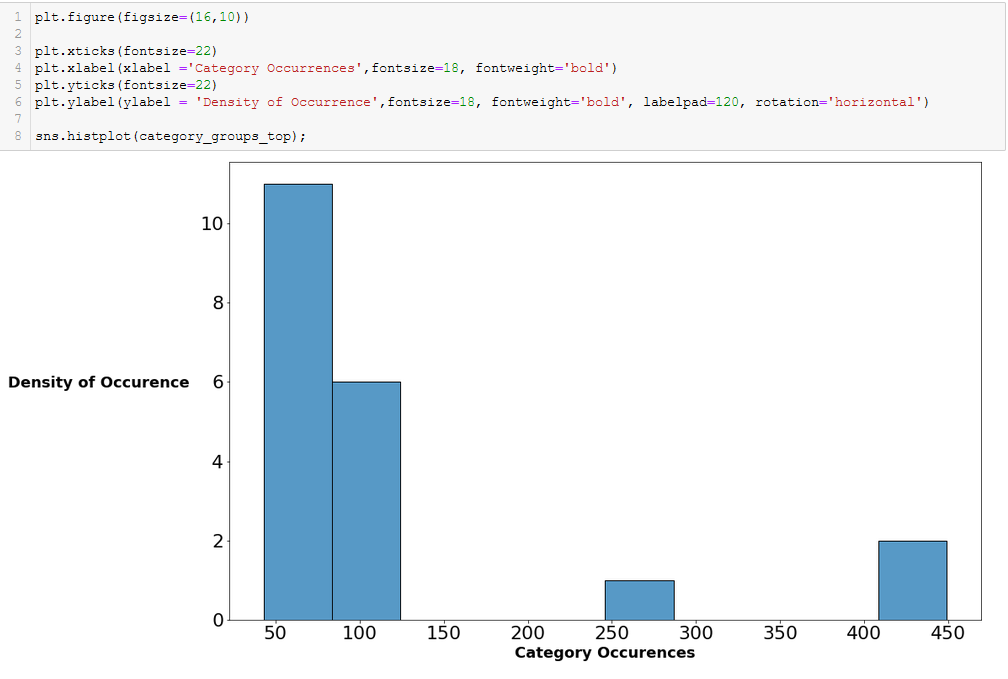

Finally is the large tail dataset, this again shows a lot of values of 1 and much less where the value is 9.

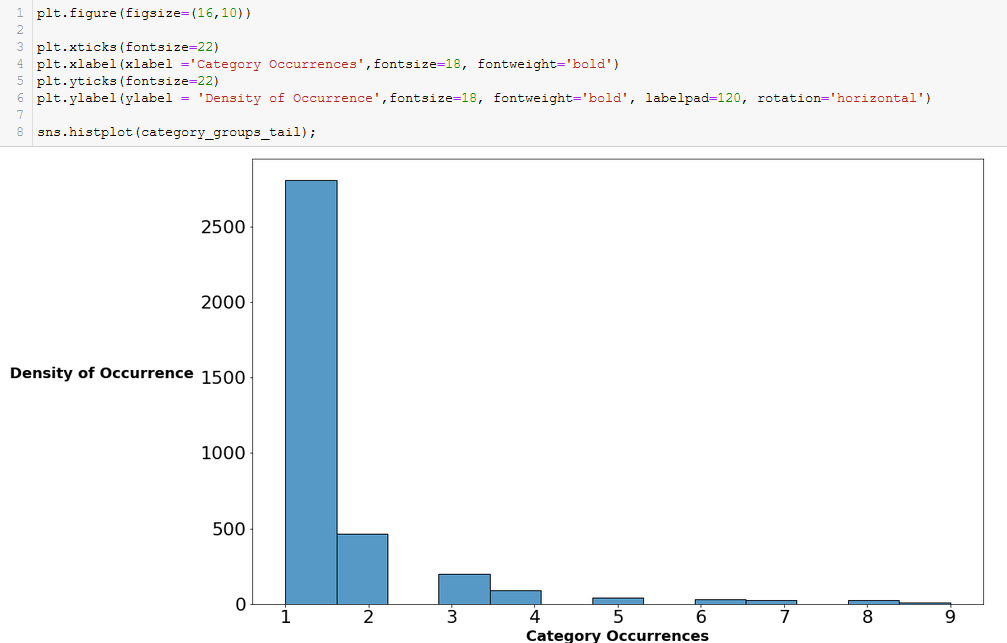

###### Part 1 - Mean Value of Games

In this section I will look at how I found which has the higher average ratings, games from prior to 1992 or those later. Once again I will start by making a copy of the dataset to work on and the first set of operations that I will perform are the mathematical calculations starting with the mean value for all values. This is very straightforward as it just needs the mean() function performed on the entire 'average_rating' feature. 

After this then is a need to have the mean value for 2 categories, games with a year_published value that is less than or equal to 1992 and then a category for newer games. I decided then to use the Pandas Pivot table functionality (Analytics Vidhya, 2020) which I constructed to contain only the 'average_rating' and 'year_published' features by dropping other others and can be seen in the below image.

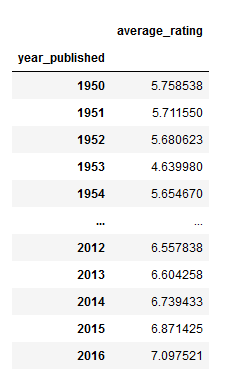

The next step that I took was to find the average ratings for the years 1992 and previous and then post 1992 which can be seen in the images below. The first set goes from 1992 back to 1950.
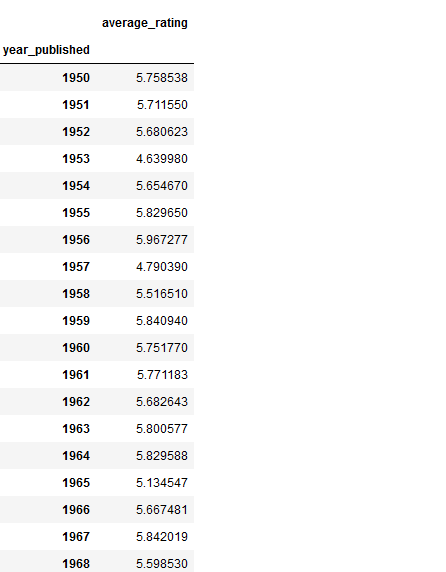

After than then the mean value for this set of years can be calculated simply by using the mean() function and is shown in the image below.

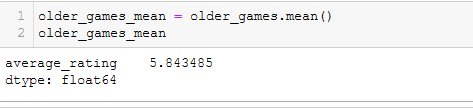

The second set of values covers from 1993 up to 2016 and can be seen in this image.
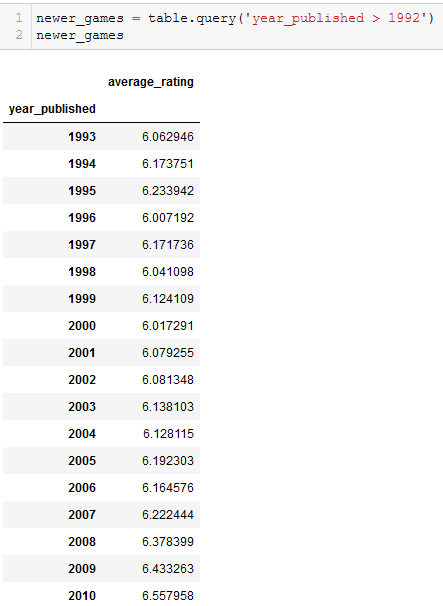

Then there is the newer games mean value for the 'average_rating' feature.

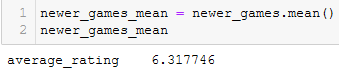

As can be seen clearly, the newer games have a slightly higher average rating. The next step is to visualise the results, in this case I decided that the best approach would be to create a new dataframe which would hold the 3 calculated mean values (older, newer and total)(GeeksforGeeks, 2020) and visualise this.

The visualisation that I have chosen is the Seaborn barplot, I have chosen this as again the visualisation is clean and can be adjusted to make it much easier to read. With that in mind I have also chosen to also use bar labels from Matplotlib (datavizpyr, 2021) so that not alone can the bars be seen but the values associated with them are displayed too. I have made both the axis tick values larger as well as the labels, I also made the plot title and axis labels bold as well as putting padding around the labels to avoid overwriting. I also used a slightly more vibrant colouring in 'set2' which is much more colorful and contrasts with both the notebook background but also the previously used styling.

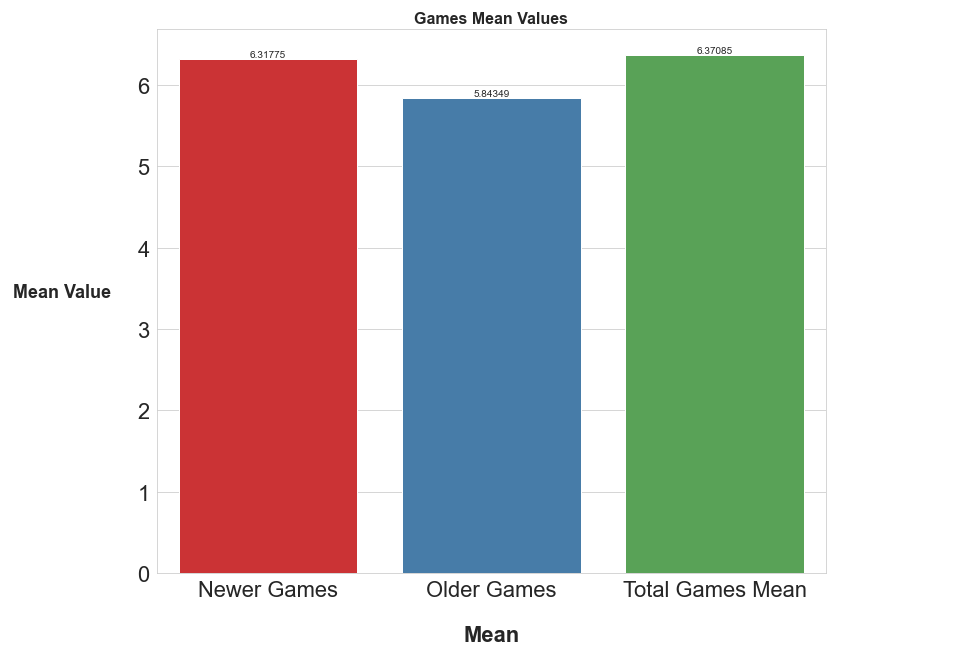

The final take away from this exercise is that newer games do have a higher average mean.

###### Part 1 - 3 Most Common Mechanics

Once again the calculations are relatively simplistic to find, by using the dataset feature 'mechanics' and applying the value_counts() function the quantity of each mechanic can be found. 

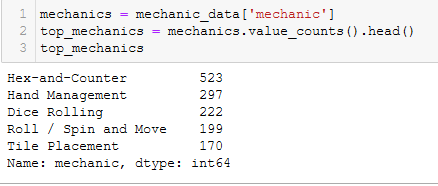

As can be seen the top 3 most common mechanics in the mechanic feature are 'Hex-and-Counter', 'Hand Management' and 'Dice Rolling'. This can be visualised by using the Plotly library and it's bar chart, in this case it will be horizontal (Plotly.com, 2015). One of the advantages of the plotly library is that it offers hover functionality so that when hovering on one of the bars it will give more indepth information about that bar.

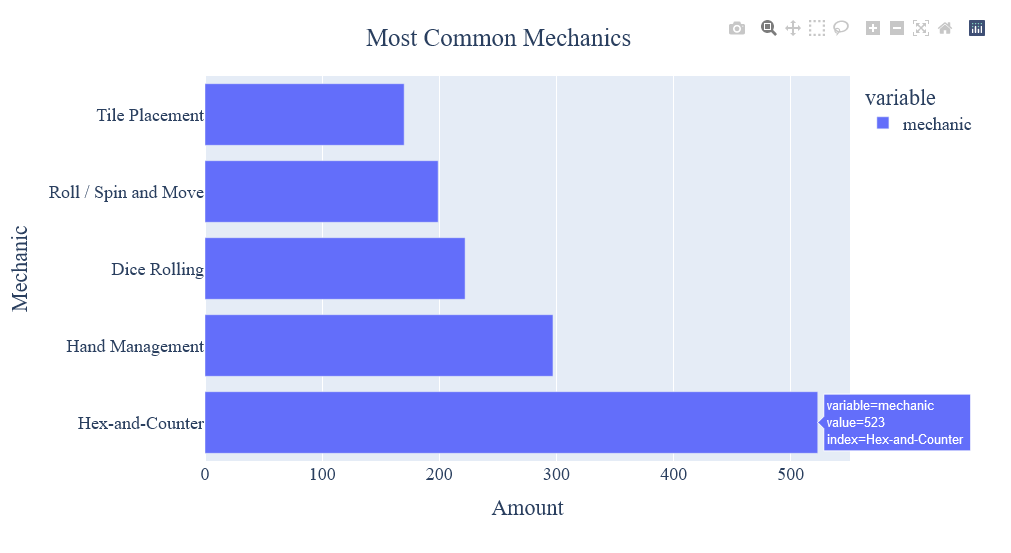

I also decided to both center the title (Plotly, 2019) and then use parameters to increase font size and set the axis labels. These make for a very clean and easy to read visualisation. 

It must also be pointed out that there are some issues with saving Plotly plots when converting a Jupyter notebook to PDF, please see additional notes.

### <center> Part 2</center> 

If we move on then to Part 2, the first idea that I had was to ask what actually is 'Statistically Relevant'. I asked myself this question because the dataset has 21 features, are they all equally important or are some of the more important than others? Are there features that we can remove even temporarily that will reduce the information that we need to deal with?

With that in mind my first task was to try and find what are the most important categories in the dataset (if any) so I began by examining the different ways that could be used to find the most important categories in the dataset (Abhini Shetye, 2019). There are several and each have their own advantages and disadvantages. 

The first technique that I put into practice is fairly straightforward as it again uses correlation and is called the Filter Method (Abhini Shetye, 2019). There is a conditionality attached to the correlation as only the features that have a certain level of correlation will be allowed to be used as they will be more important in this case positive correlations only. There is also a need for the average_rating column to be dropped as that will be used as the target variable, it will also return a perfect positive correltation value of 1.

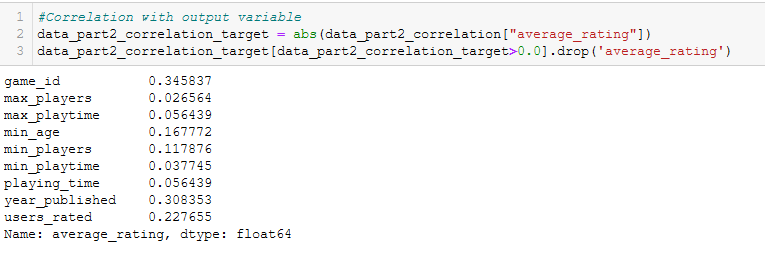

The Sklearn library to import MinMaxScaler to introduce a commonality of scales being used by the different columns if desired, it is then the selection of only numerical data type by using the select_dtypes() function and selecting numerical types such as 'int64' and 'float64'. These columns are used to create a new dataframe which is passed in
to the MinMaxScaler.fit_transform() function which takes a dataframe, fits to the data and transforms it before outputting the result. The result will have to be converted back to a dataframe as it is in the form of a numpy array so the pd.DataFrame() function will have to be used with the result as a parameter as well as column names. See the below image.

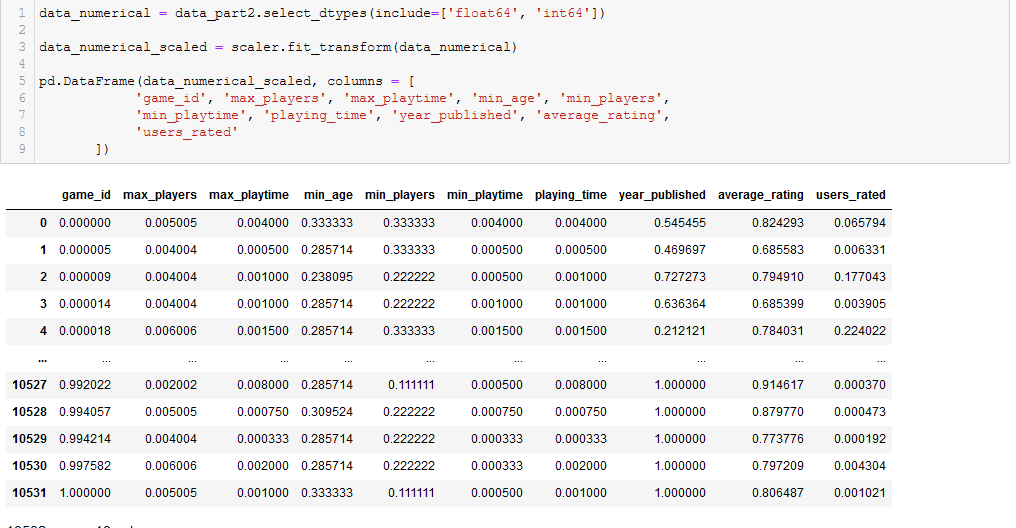

After then is the parallel_coordinates visualisation, in this case I decided to use the non-scaled version of the dataframe as it shows much a much easier to understand relationship between the various numerical columns for example there is a high amount of correlation between higher average ratings and a higher amount of users that have rated a game.

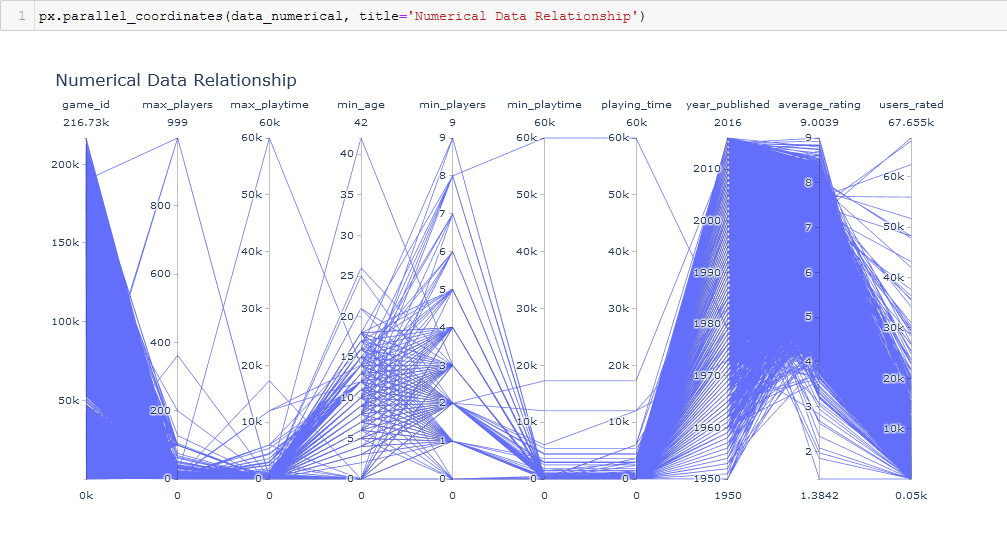

#### Regressions and Predictions - 

Using the most important features from the data and performing both regression analysis and also some predictions to see if we can predict outcomes on the data.

To start off I decided to look at a simple linear regression to check the relationship between 2 columns, in this case I decided to use 'average_rating' and 'users_rated'. I also decided to split the data into a test set and a training set as is used in Machine Learning and utilise these techniques for both regressions and predictions.

To start with I imported the train_test_split module from Sklearn which allows for data splitting and split the data in an 80:20 ratio where 80% is for training and the other 20% is for test purposes. Once split then the data is passed in to LinearRegression() function from Sklearn and each of the sets can be visualised using a scatter plot, beginning with the dataset. 

I have also continued with editing the major landmarks around plots such as tick sizes and fontweights to ensure maximum readability as well as using different colours for plotting each of the scatterplots.

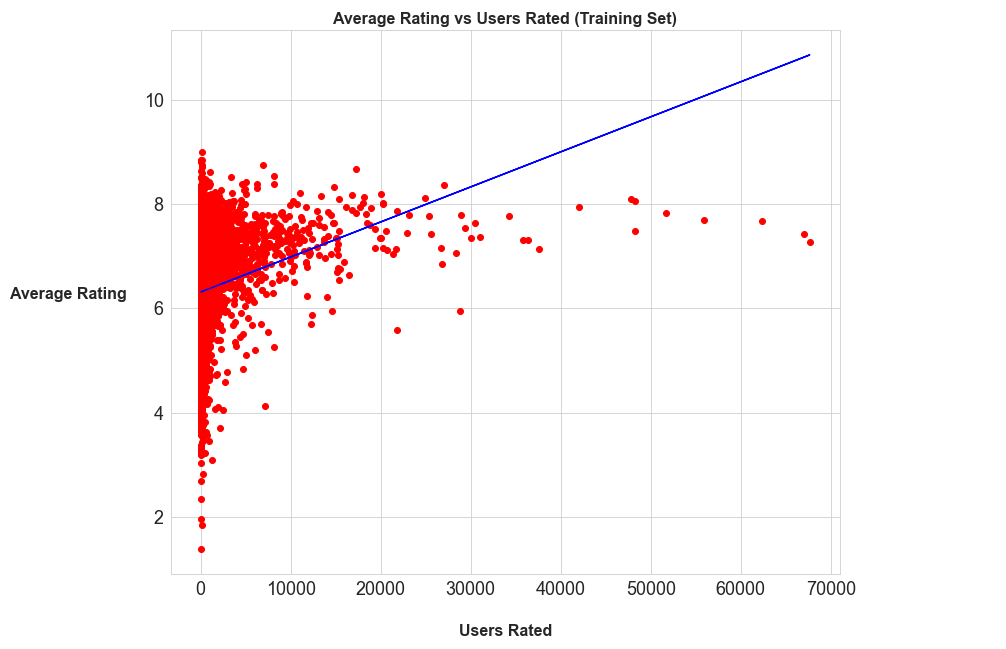

Then there is the test set of data.

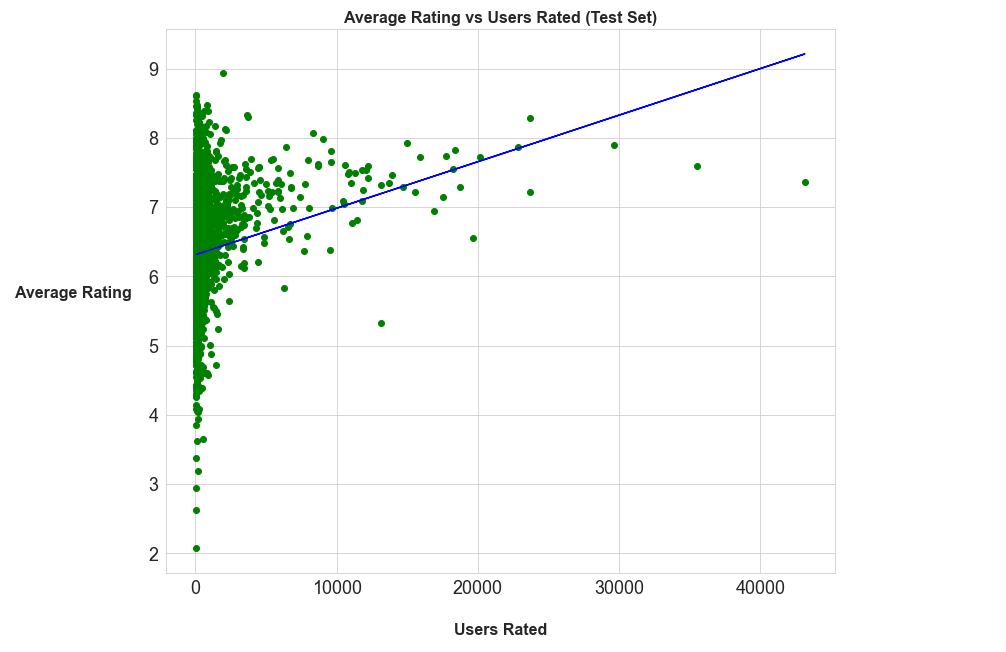

Finally is the opportunity to assess the precision of the algorithm. Unfortunately in this case neither the test or training set offer anything like a usable level of precision.

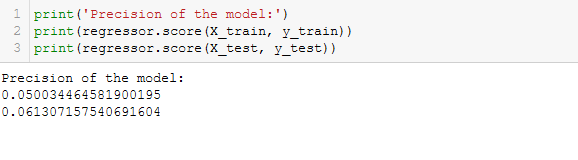

##### Predictions,
In this case I decided to use the Support Vector Machine technique to check whether an average rating could be predicted using user input parameters(Avinash Navlani, 2019).

With this in mind as usual I made a copy of the data to work on, then I removed null or n\a values from the dataset which would affect generating predictions. Then I chose the columns that I would use in the example, this is done using the loc() function rather than iloc() as I will use the column names rather than index values (B. Chen, 2021). It must also be said that the value for the y-axis must be categorial in nature.

After the columns have been chosen then the data is split into test and training sets, I again used the same parameters as above. Then it is time to fit the data to a scaler in this case the StandardScaler (scikit-learn, 2021b) which differs from the MinMaxScaler used previously(GeeksforGeeks, 2020b). There is also a need to use the ravel() method as the scaler expects a 1 dimensional array whereas the 'category' column is a column vector but this corrects the error.

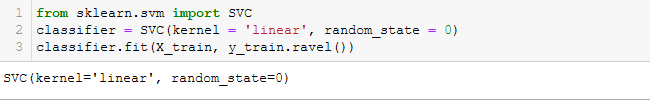

After this then is the time where I will enter a set of parameters and this will generate a prediction of what category of game they would belong to. There are a couple of things to remember though, the number of parameters must match the number of columns passed in, e.g. if when setting the X value 7 columns are used then 7 parameters of the correct type must be added in order that no errors occur.

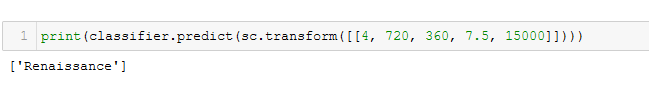

In the case above the parameters are

    - Minimum of 4 players
    - Maximum Playtime of 720
    - Playing Time of 360
    - Average Rating of 7.5
    - Number of Users Rated 15000

This then predicted that the game would be of the category 'Renaissance'

Finally is the opportunity to assess how the y_test compares to y_pred, again unfortunately it is not good enough to be really usable, however as above the dataset can be tuned along with parameters and values to help with getting better results.

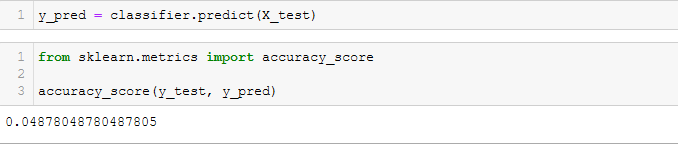

### <center> Additional Notes </center> 

All additional packages for installation are at the top of the file however there are some additional notes needed.

I installed the warnings package, this package allows for supressing warnings that may arise from running a cell e.g. Version warnings. This package has several filters that can be applied, in this case it will be 'FutureWarnings' which warn about newer versions and the action is set to ignore which will ignore this type of warning when it appears.

I have installed the plotly.express, this is shows interactive plots which work well within the notebook environment, however it does not render properly when converting the notebook to a PDF file. With that in mind I decided that generating a static image of the plot would be a good idea (Plotly.com, 2021). To this end I installed the kaleido library which allows for generating static images of plots and exporting them. I set the export directory to be the same as the notebook but this can be changed and added the image into a cell below for comparing.

Matplotlib has a newer feature which allows for displaying values on bars in a barplot visualisation, this may cause an error such as not having a bar_label() method unless the version being used is new enough.

### References

Abhini Shetye (2019). Feature Selection with sklearn and Pandas - Towards Data Science. [online] Medium. Available at: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b [Accessed 26 Oct. 2021].

Analytics Vidhya. (2020). Pandas Pivot table | Create Pivot Table Using Pandas in Python. [online] Available at: https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/ [Accessed 26 Oct. 2021].

Avinash Navlani (2019). Sklearn SVM (Support Vector Machines) with Python. [online] DataCamp Community. Available at: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python [Accessed 29 Oct. 2021].

B. Chen (2021). How to use loc and iloc for selecting data in Pandas. [online] Medium. Available at: https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79 [Accessed 29 Oct. 2021].

datavizpyr (2021). How To Annotate Barplot with bar_label() in Matplotlib - Data Viz with Python and R. [online] Data Viz with Python and R. Available at: https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/ [Accessed 29 Oct. 2021].

Darío Weitz (2021). Parallel Coordinates Plots with Plotly - Towards Data Science. [online] Medium. Available at: https://towardsdatascience.com/parallel-coordinates-plots-with-plotly-dffe3f526c6b [Accessed 27 Oct. 2021].

GeeksforGeeks. (2018). f-strings in Python - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/ [Accessed 27 Oct. 2021].

GeeksforGeeks. (2020a). How to create DataFrame from dictionary in Python-Pandas? - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/how-to-create-dataframe-from-dictionary-in-python-pandas/ [Accessed 29 Oct. 2021].

GeeksforGeeks. (2020b). StandardScaler, MinMaxScaler and RobustScaler techniques - ML - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=StandardScaler%20follows%20Standard%20Normal%20Distribution,negative%20values%20in%20the%20dataset. [Accessed 29 Oct. 2021].

Plotly.com. (2015). Horizontal Bar Charts. [online] Available at: https://plotly.com/python/horizontal-bar-charts/ [Accessed 28 Oct. 2021].

Plotly (2019). Title Alignment Python. [online] Plotly Community Forum. Available at: https://community.plotly.com/t/title-alignment-python/30820 [Accessed 28 Oct. 2021].

Plotly.com. (2021). Static Image Export. [online] Available at: https://plotly.com/python/static-image-export/ [Accessed 28 Oct. 2021].

Pydata.org. (2012a). Horizontal bar plots — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/examples/part_whole_bars.html [Accessed 25 Oct. 2021].

Pydata.org. (2012b). seaborn.distplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.distplot.html [Accessed 25 Oct. 2021].

Pydata.org. (2012). seaborn.heatmap — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html [Accessed 22 Oct. 2021].

Pydata.org. (2012d). seaborn.kdeplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot [Accessed 25 Oct. 2021].

Matplotlib.org. (2012b). Rotating custom tick labels — Matplotlib 3.4.3 documentation. [online] Available at: https://matplotlib.org/stable/gallery/ticks_and_spines/ticklabels_rotation.html?highlight=xticks%20rotation [Accessed 22 Oct. 2021].

Matplotlib.org. (2012). Choosing Colormaps in Matplotlib — Matplotlib 3.4.3 documentation. [online] Available at: https://matplotlib.org/stable/tutorials/colors/colormaps.html [Accessed 22 Oct. 2021].

rasbt (2014). pattern_classification/latex_equations.md at master · rasbt/pattern_classification. [online] GitHub. Available at: https://github.com/rasbt/pattern_classification/blob/master/resources/latex_equations.md [Accessed 22 Oct. 2021].

ResidentMario (2021). GitHub - ResidentMario/missingno: Missing data visualization module for Python. [online] GitHub. Available at: https://github.com/ResidentMario/missingno [Accessed 20 Oct. 2021].

scikit-learn. (2021). sklearn.preprocessing.MinMaxScaler. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html [Accessed 28 Oct. 2021].

scikit-learn. (2021b). sklearn.preprocessing.StandardScaler. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html [Accessed 29 Oct. 2021].

Thiago Carvalho (2020). Heatmap Basics with Seaborn - Towards Data Science. [online] Medium. Available at: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c [Accessed 22 Oct. 2021].